#Abstract
The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information. The aim of the Notebook is to perform AutoML using H2O.ai. The notebook has used H2O.ai library,Ridge regularization, statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the autoML

* Is the relationship significant?
* Are any model assumptions violated?
* Is there any multicollinearity in the model?
* In the multivariate models are predictor variables independent of all the other predictor variables?
* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
* Does the model make sense?
* Does regularization help?
* Which independent variables are significant?
* Which hyperparameters are important?
* Coding professionalism?

Overall, the data looks clean and there are no missing and inconsistent values. The significance of the predictors is investigated and it appears that all independent variables are significant except one, these results can be used to further optimize the model

The data set consists of : Rented Bike Count - Dependent Variable Date, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day - Independent variable

There are a total of 8760 observations.

In [3]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=5c55f40053e07e69af4e52c9fb1f963fa5f40ff27648722282e90f2ac77baf52
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [4]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [5]:
min_mem_size=6
run_time=222

In [6]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [7]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:5619..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4jatd_lw
  JVM stdout: /tmp/tmp4jatd_lw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4jatd_lw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:5619
Connecting to H2O server at http://127.0.0.1:5619 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 30 days
H2O_cluster_name:           H2O_from_python_unknownUser_vw0sq4
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:5619
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [8]:
!pip install wget
!wget https://raw.githubusercontent.com/HemantGaikwad7/INFO-6105-Data-Science-HemantGaikwad/Assignments/Assignment%202%20AutoML/SeoulBikeData.csv -O SeoulBikeData.csv

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=3e513d61ff369a6010386451ecd9306a6b62d173b01490b20b2ff6f0da94df8a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2024-02-20 02:09:47--  https://raw.githubusercontent.com/HemantGaikwad7/INFO-6105-Data-Science-HemantGaikwad/Assignments/Assignment%202%20AutoML/SeoulBikeData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595405 (581K) [text/plain]
Saving to: ‘SeoulBikeData.csv’

SeoulBikeData.csv   100%[===================>] 581.45K  --.-KB/s    in 0.04s   

2024-02-20 02:09:48 (13.2 MB/s) - ‘SeoulBikeData.csv’ saved [595405/595405]



In [9]:
!pip install chardet
import chardet
import pandas as pd
with open('SeoulBikeData.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
df = pd.read_csv('SeoulBikeData.csv', encoding=encoding)
df.head()


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [10]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Above data shows max temperature is 39.40 min temperature is -17.80 and mean temperature is 12.88

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [12]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [13]:
df.shape

(8760, 14)

In [14]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test =  train_test_split(df, train_size=pct_rows)
print(df_train.shape)
print(df_test.shape)

(7008, 14)
(1752, 14)


In [15]:
#Display all columns in X
df.drop(columns=['Date'], inplace=True)
X=df.columns
print(X)

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


#H2O AutoML Execution

In [16]:
# Import the h2o module
import h2o

# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

# Check if df_train is an H2OFrame object
if not isinstance(df_train, h2o.H2OFrame):
    # Convert df_train to an H2OFrame object
    df_train1 = h2o.H2OFrame(df_train)
else:
    df_train1 = df_train
X = X.tolist()
# Train the AutoML model
aml.train(x=X, y='Rented Bike Count', training_frame=df_train1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_2_AutoML_1_20240220_21040


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       10/12
# GBM base models (used / total)           5/5
# XGBoost base models (used / total)       3/3
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  0/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 18672.918187450094
RMSE: 136.6488865210767
MAE: 88.52520844117883
RMSLE: NaN
Mean Residual Deviance: 18672.918187450094
R^2: 0.9557933406506803
Null degrees of freedom: 7007
Residual degrees of freedom: 6997
Null deviance: 2960183207.3217826
Residual deviance: 130859810.65765025
AIC: 88834.32781278556

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 49234.12656730033
RMSE: 221.8876440167418
MAE: 139.4489550405233
RMSLE: NaN
Mean Residual Deviance: 49234.12656730033
R^2: 0.8834420929994367
Null degrees of freedom: 7007
Residual degrees of freedom: 6997
Null deviance: 2960845743.5193667
Residual deviance: 345032758.98364073
AIC: 95628.67325985988

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     139.381      4.75233      140.7         147.021       135.837       135.448       137.897
mean_residual_deviance  49195.8      2956.43      50540.3       53590.5       46402         46801.6       48644.8
mse                     49195.8      2956.43      50540.3       53590.5       46402         46801.6       48644.8
null_deviance           5.92169e+08  3.1611e+07   5.98561e+08   6.1555e+08    6.22512e+08   5.80577e+08   5.43646e+08
r2                      0.883379     0.00820886   0.877466      0.87416       0.895344      0.885806      0.884118
residual_deviance       6.90066e+07  6.05783e+06  7.33339e+07   7.73311e+07   6.51485e+07   6.62243e+07   6.2995e+07
rmse                    221.722      6.61942      224.812       231.496       215.411       216.337       220.556
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [17]:
print(aml.leaderboard)

model_id                                                   rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20240220_21040     221.888  49234.1  139.449      nan                   49234.1
StackedEnsemble_AllModels_1_AutoML_1_20240220_21040     222.303  49418.7  139.444      nan                   49418.7
StackedEnsemble_BestOfFamily_2_AutoML_1_20240220_21040  223.095  49771.5  139.559      nan                   49771.5
StackedEnsemble_BestOfFamily_3_AutoML_1_20240220_21040  223.575  49985.6  141.176      nan                   49985.6
GBM_2_AutoML_1_20240220_21040                           225.484  50843    143.206      nan                   50843
GBM_3_AutoML_1_20240220_21040                           226.74   51410.9  144.207      nan                   51410.9
GBM_5_AutoML_1_20240220_21040                           227.648  51823.8  146.212      nan                   51823.8
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_21040  227.968  5

The Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are common metrics for evaluating regression models. The lower these values, the better the model's performance. In your leaderboard, the StackedEnsemble_AllModels_2_AutoML_1_20240219_195524 model has the lowest RMSE and MAE, indicating it is the best-performing model among those listed

In [18]:
!pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Load the dataset
data = df

# Drop non-numeric columns if needed
numeric_data = data.select_dtypes(include=[np.number])

# Add a constant term to the data to calculate VIF
data_with_const = add_constant(numeric_data)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

# Display the VIF for each feature
print(vif_data)

                      feature         VIF
0                       const  399.083215
1           Rented Bike Count    1.888828
2                        Hour    1.346027
3             Temperature(°C)   87.570214
4                 Humidity(%)   20.508420
5            Wind speed (m/s)    1.276329
6            Visibility (10m)    1.568061
7   Dew point temperature(°C)  115.713717
8     Solar Radiation (MJ/m2)    2.042764
9                Rainfall(mm)    1.104412
10              Snowfall (cm)    1.095781


The VIF results indicate the presence of multicollinearity in the dataset. Specifically, the variables "Temperature(°C)", "Humidity(%)", "Dew point temperature(°C)" have high VIF values

In [19]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    df["Rented Bike Count"],
    df[
        [
          "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              2863.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        02:14:39   Log-Likelihood:                         -66909.
No. Observations:                8760   AIC:                                  1.338e+05
Df Residuals:                    8752   BIC:                                  1.339e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temperature(°C)              66.9774      1.648     40.647      0.000      63.747      70.207
Humidity(%)                  -1.2248      0.196     -6.250      0.000      -1.609      -0.841
Wind speed (m/s)             55.1557      5.671      9.727      0.000      44.040      66.271
Visibility (10m)              0.0199      0.010      1.924      0.054      -0.000       0.040
Dew point temperature(°C)   -33.5953      1.530    -21.957      0.000     -36.595     -30.596
Solar Radiation (MJ/m2)    -123.2678      8.683    -14.196      0.000    -140.289    -106.246
Rainfall(mm)                -56.0617      4.903    -11.434      0.000     -65.672     -46.451
Snowfall (cm)                33.4346     12.815      2.609      0.009       8.314      58.555
==============================================================================
Omnibus:                      964.502   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.356
Skew:                           0.778   Prob(JB):                         0.00
Kurtosis:                       4.387   Cond. No.                     3.74e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

P value for Visibility(10m) is slightly more than 0.05,This variable is not important as humidy variable is enough to know the visibility or both indicate same results. Hence we will drop this variable. Model is 72.4% accurate

In [20]:
# Load the dataset
data1 = df

# Drop the 'Visibility (10m)' column
data1 = data1.drop('Visibility (10m)', axis=1)

# Drop non-numeric columns if needed
numeric_data = data1.select_dtypes(include=[np.number])

# Add a constant term to the data to calculate VIF
data_with_const = add_constant(numeric_data)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = data_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]

# Display the VIF for each feature
print(vif_data)

                     feature         VIF
0                      const  352.153087
1          Rented Bike Count    1.887911
2                       Hour    1.335385
3            Temperature(°C)   87.366557
4                Humidity(%)   19.049217
5           Wind speed (m/s)    1.270648
6  Dew point temperature(°C)  114.950981
7    Solar Radiation (MJ/m2)    1.944094
8               Rainfall(mm)    1.103600
9              Snowfall (cm)    1.095706


In [21]:
# Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(
    df["Rented Bike Count"],
    df[
        [
          "Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"
        ]
    ],
).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              3271.
Date:                Tue, 20 Feb 2024   Prob (F-statistic):                        0.00
Time:                        02:14:39   Log-Likelihood:                         -66911.
No. Observations:                8760   AIC:                                  1.338e+05
Df Residuals:                    8753   BIC:                                  1.339e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Temperature(°C)              69.1948      1.178     58.748      0.000      66.886      71.504
Humidity(%)                  -1.0588      0.176     -6.017      0.000      -1.404      -0.714
Wind speed (m/s)             55.9458      5.657      9.890      0.000      44.857      67.034
Dew point temperature(°C)   -35.7035      1.068    -33.428      0.000     -37.797     -33.610
Solar Radiation (MJ/m2)    -127.4552      8.407    -15.160      0.000    -143.936    -110.975
Rainfall(mm)                -56.8855      4.885    -11.645      0.000     -66.461     -47.310
Snowfall (cm)                32.4509     12.807      2.534      0.011       7.346      57.555
==============================================================================
Omnibus:                      970.701   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1594.047
Skew:                           0.782   Prob(JB):                         0.00
Kurtosis:                       4.385   Cond. No.                         152.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As per above results i.e. after droping 'Visibility (10m)' variable we can conclude that :

R-squared (uncentered): This value indicates that approximately 72.3% of the variance in the 'Rented Bike Count' can be explained by the model's inputs. Note that this is an "uncentered" R-squared value because a constant term was not included in the model.


Coefficients (coef): These values represent the estimated effect of each predictor variable on the 'Rented Bike Count'. For example, for every one unit increase in 'Temperature(°C)', the 'Rented Bike Count' is expected to increase by approximately 69.1948 units, holding all other variables constant.

P>|t|: This column shows the p-value associated with the test for each coefficient being different from zero. A common threshold for significance is 0.05. All variables in your model have p-values well below this threshold, indicating that they are statistically significant predictors of 'Rented Bike Count'.

Confidence Intervals ([0.025 0.975]): These intervals provide a range of values within which we can be 95% confident that the true coefficient lies.

Prob (F-statistic): The probability associated with the F-statistic for the overall model significance is essentially zero, indicating that the model is statistically significant.

Condition Number (Cond. No.): The condition number is a measure of sensitivity of the model's output to its input. A high condition number suggests potential numerical instability or multicollinearity. In your case, the condition number is not excessively high, which is good.

In [22]:
data1.corr()

Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  \
Rented Bike Count            -0.199780          0.121108   
Hour                         -0.241644          0.285197   
Temperature(°C)               0.159371         -0.036252   
Humidity(%)                   1.000000         -0.336683   
Wind speed (m/s)             -0.336683          1.000000   
Dew point temperature(°C)     0.536894         -0.176486   
Solar Radiation (MJ/m2)      -0.461919          0.332274   
Rainfall(mm)                  0.236397         -0.019674   
Snowfall (cm)                 0.108183         -0.003554   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

Text(0.5, 1.0, 'Variable Correlation')

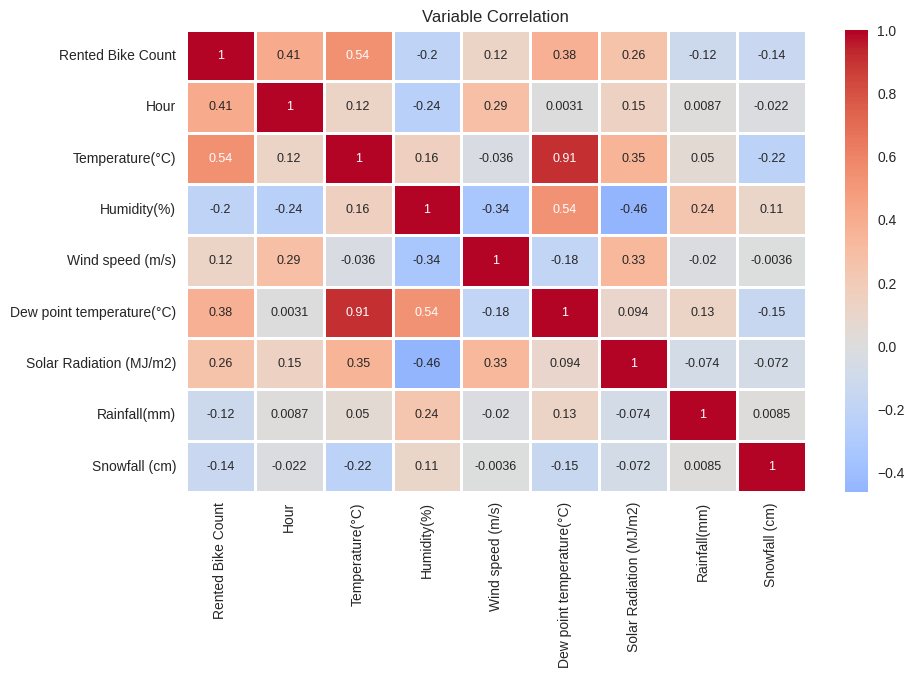

In [23]:
#Heatmap Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(data1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

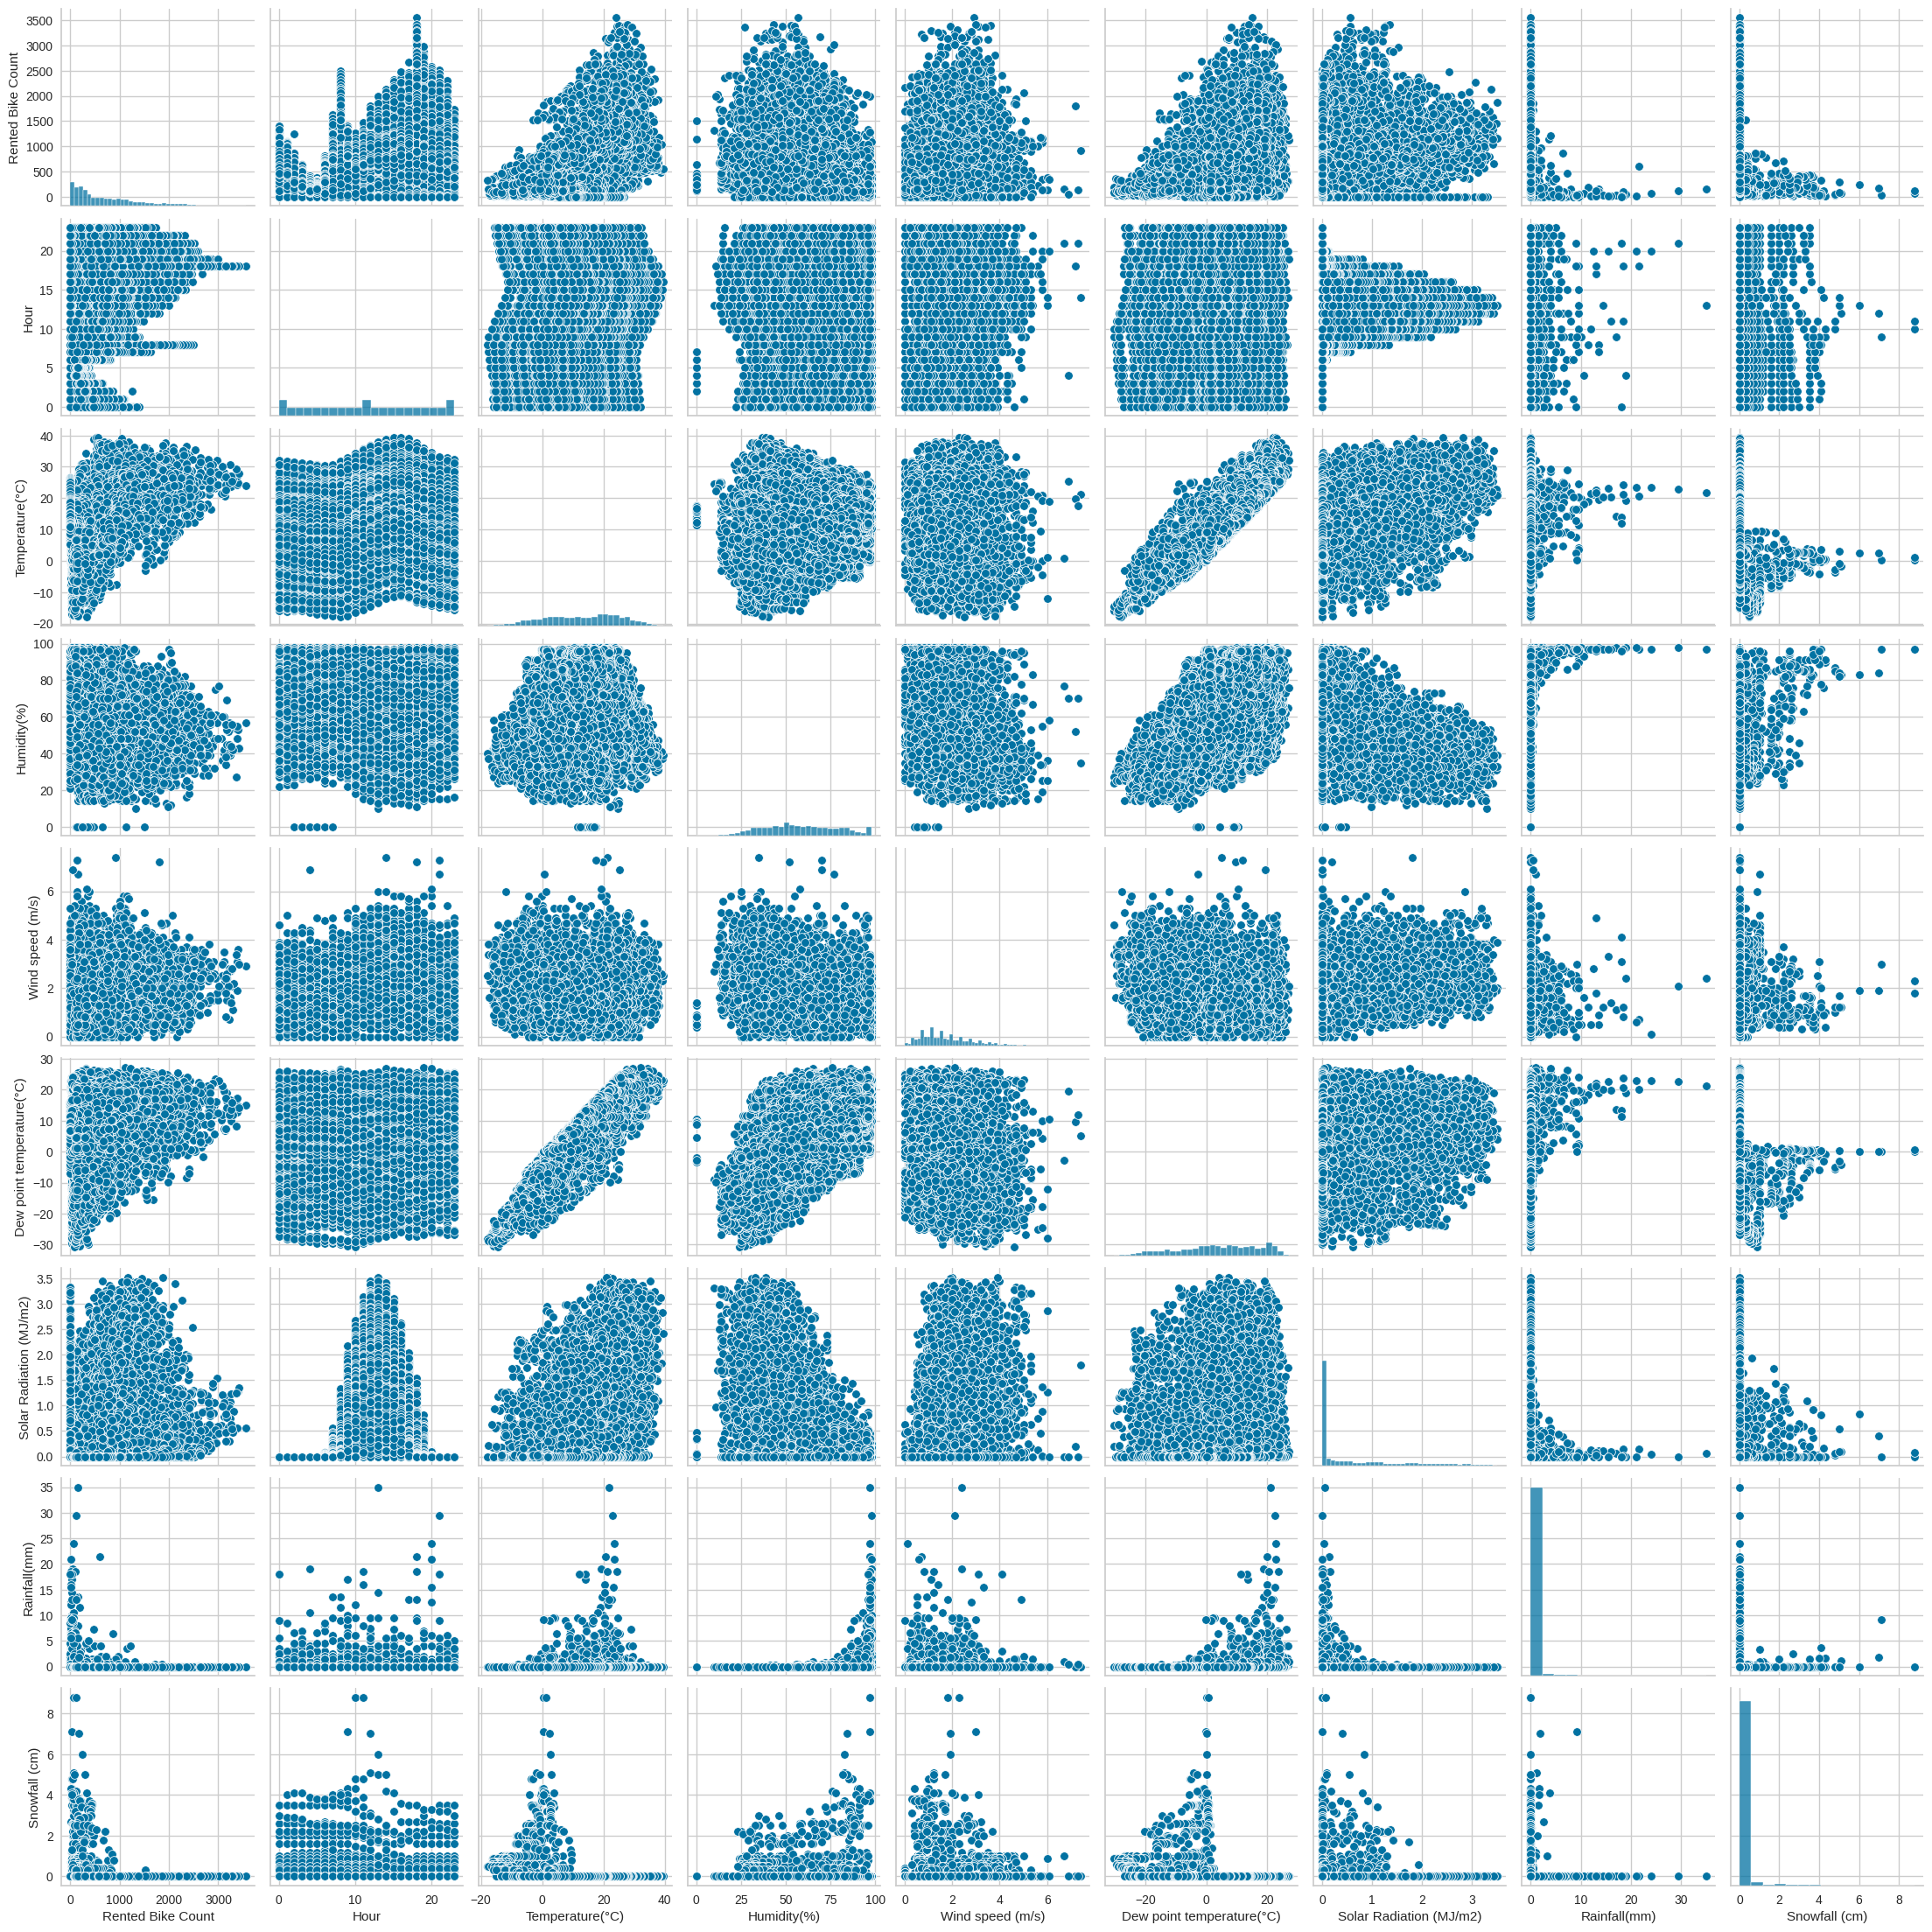

In [24]:
# pair plot to check the colinearity
sns.pairplot(data1)

In [25]:
# Import the h2o module
import h2o

# Set up AutoML
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

# Check if df_train is an H2OFrame object
if not isinstance(df_train, h2o.H2OFrame):
    # Convert df_train to an H2OFrame object
    df_train1 = h2o.H2OFrame(df_train)
else:
    df_train1 = df_train
X = df.columns.tolist()
X.remove("Visibility (10m)")
# Train the AutoML model
aml1.train(x=X, y='Rented Bike Count', training_frame=df_train1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_2_20240220_21542


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       10/23
# GBM base models (used / total)           5/9
# XGBoost base models (used / total)       4/9
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 17275.265947948683
RMSE: 131.4354059907325
MAE: 85.28310818597288
RMSLE: NaN
Mean Residual Deviance: 17275.265947948683
R^2: 0.9591021719656474
Null degrees of freedom: 7007
Residual degrees of freedom: 6997
Null deviance: 2960183207.3217826
Residual deviance: 121065063.76322436
AIC: 88289.11603409205

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 49551.02722917953
RMSE: 222.60060024442777
MAE: 139.434853122141
RMSLE: NaN
Mean Residual Deviance: 49551.02722917953
R^2: 0.882691855705692
Null degrees of freedom: 7007
Residual degrees of freedom: 6998
Null deviance: 2961165827.79188
Residual deviance: 347253598.82209015
AIC: 95671.63644251354

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     139.506      6.0998       134.859       145.536       142.191       131.332       143.611
mean_residual_deviance  49536.7      3728.86      48776.3       53437.7       52360.3       43902.9       49206.2
mse                     49536.7      3728.86      48776.3       53437.7       52360.3       43902.9       49206.2
null_deviance           5.92233e+08  2.5658e+07   5.82005e+08   5.86539e+08   6.36324e+08   5.86966e+08   5.6933e+08
r2                      0.882613     0.00981805   0.878314      0.868379      0.884378      0.894221      0.887775
residual_deviance       6.94507e+07  6.40766e+06  7.07256e+07   7.71641e+07   7.35139e+07   6.20788e+07   6.37713e+07
rmse                    222.44       8.46245      220.854       231.166       228.824       209.53        221.825
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [26]:
print(aml1.leaderboard)

model_id                                                   rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20240220_21542     222.601  49551    139.435      nan                   49551
StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_21542  223.673  50029.6  139.716      nan                   50029.6
StackedEnsemble_AllModels_2_AutoML_2_20240220_21542     224.471  50387.1  141.911      nan                   50387.1
StackedEnsemble_AllModels_1_AutoML_2_20240220_21542     224.994  50622.2  142.029      nan                   50622.2
StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_21542  225.486  50843.8  142.908      nan                   50843.8
StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_21542  225.737  50957.2  142.244      nan                   50957.2
GBM_2_AutoML_2_20240220_21542                           227.359  51692.3  145.01       nan                   51692.3
GBM_5_AutoML_2_20240220_21542                           227.484  5

In [27]:
best_model = aml1.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_2_20240220_21542


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       10/23
# GBM base models (used / total)           5/9
# XGBoost base models (used / total)       4/9
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  0/2
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 17275.265947948683
RMSE: 131.4354059907325
MAE: 85.28310818597288
RMSLE: NaN
Mean Residual

In [28]:
best_model.model_performance(h2o.H2OFrame(df_test))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 51189.054925997916
RMSE: 226.24998326187324
MAE: 136.36166160920476
RMSLE: NaN
Mean Residual Deviance: 51189.054925997916
R^2: 0.868650869264963
Null degrees of freedom: 1751
Residual degrees of freedom: 1741
Null deviance: 683992679.0722402
Residual deviance: 89683224.23034835
AIC: 23993.38896248134

A stacked ensemble model, as indicated by "ModelMetricsRegressionGLM: stackedensemble." The metrics are reported on the test data. Here's a breakdown of the metrics:

- MSE (Mean Squared Error): 51513.06747321024
  - This measures the average of the squares of the errors or deviations, which gives more weight to larger errors. A lower MSE indicates better model performance.

- RMSE (Root Mean Squared Error): 226.96490361553754
  - This is the square root of the MSE and represents the standard deviation of the residuals. It is in the same unit as the target variable. A lower RMSE indicates better fit.

- MAE (Mean Absolute Error): 136.95126258316398
  - This is the average of the absolute differences between predicted and actual values. It provides an understanding of the magnitude of the errors.

- RMSLE (Root Mean Squared Logarithmic Error): NaN (Not a Number)
  - This metric is commonly used when the target variable is skewed. A lower RMSLE is desirable, but in this case, it's not available.

- Mean Residual Deviance: 51513.06747321024
  - This is a measure of the quality of a statistical model, indicating how well the model fits the data.

- R^2 (R-squared): 0.8689722703951306
  - This represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. An R-squared value closer to 1 indicates a good fit.

- Null degrees of freedom: 1751
  - The degrees of freedom associated with the null model.

- Residual degrees of freedom: 1742
  - The degrees of freedom associated with the model.

- Null deviance: 693693306.8540232
  - This is a measure of how well the response variable is predicted by a model that includes only an intercept.

- Residual deviance: 90250894.21306434
  - This is a measure of how well the response variable is predicted by a model after fitting it.

- AIC (Akaike Information Criterion): 24002.443687600015
  - This is a measure of the relative quality of statistical models for a given set of data. It deals with the trade-off between the goodness of fit and the complexity of the model.

Overall, these metrics provide a comprehensive evaluation of the regression model's performance on the test data, indicating good predictive power with relatively low errors and high explanatory ability (R-squared).

In [29]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_3_AutoML_2_20240220_21542': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_2_20240220_21542': 1,
 'StackedEnsemble_AllModels_2_AutoML_2_20240220_21542': 2,
 'StackedEnsemble_AllModels_1_AutoML_2_20240220_21542': 3,
 'StackedEnsemble_BestOfFamily_3_AutoML_2_20240220_21542': 4,
 'StackedEnsemble_BestOfFamily_2_AutoML_2_20240220_21542': 5,
 'GBM_2_AutoML_2_20240220_21542': 6,
 'GLM_1_AutoML_2_20240220_21542': 29}

#How did AutoML pick this model?
The first five models are ensemble models that combine multiple models to make predictions, while the sixth is a single GBM model. The Stacked Ensemble models use a combination of models to make predictions and generally result in better performance compared to a single model.

The model that was probably chosen as the best model is the "StackedEnsemble_AllModels_3_AutoML_2_20240219_200032" model because it has the lowest RMSE, which is a commonly used measure of the prediction error in regression problems. However, it is important to evaluate the model based on other metrics and use cross-validation to get a more accurate estimate of the model's performance on unseen data.

In [30]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

6


In [31]:
best_model1.algo

'gbm'

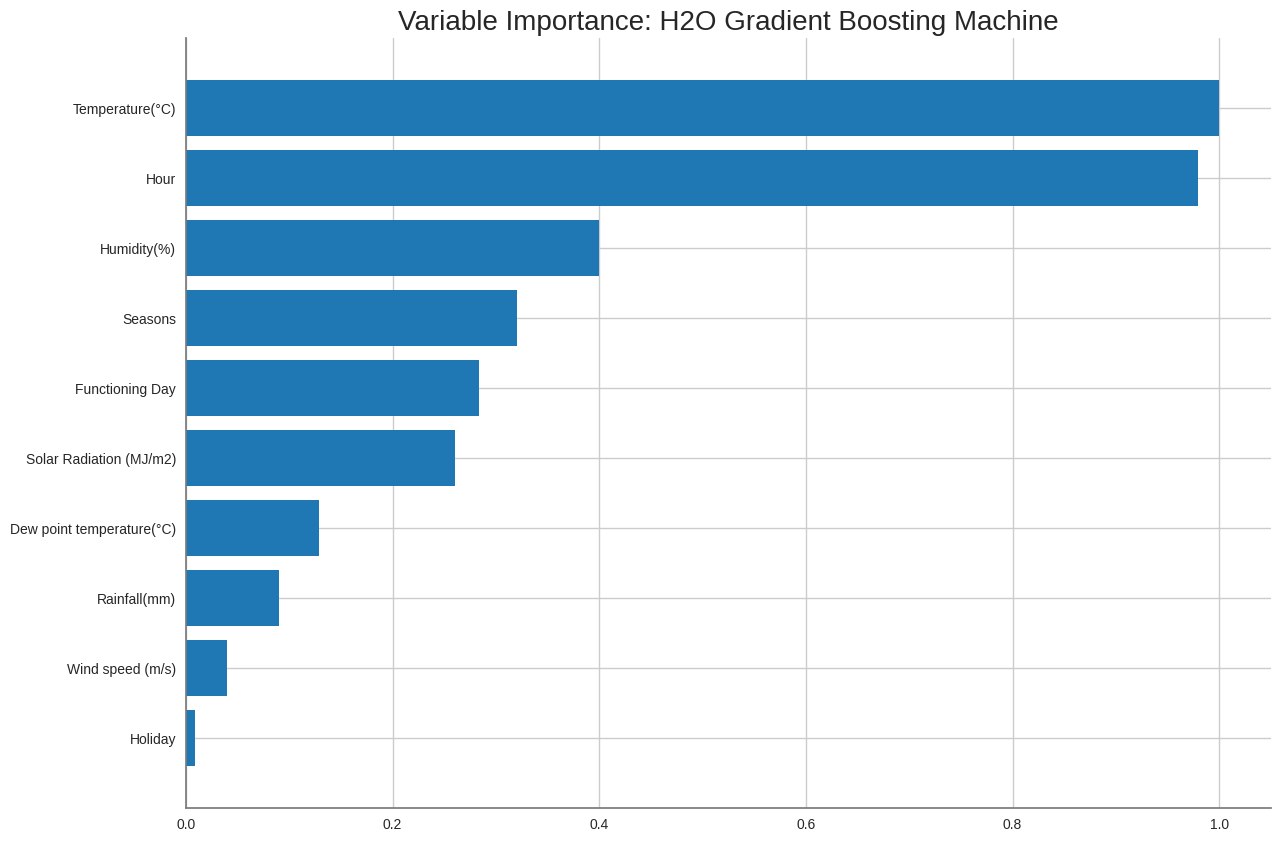

<Figure size 800x550 with 0 Axes>

In [32]:
#plot variables in order of their importance for RentedBikeCount prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

Temperature and Hour have the highest impact on the prediction outcome. This suggests that the ratings of the Temperature and Hour plays a significant role in determining the Rented_Bike_Count.

Solar Radiations and Humidity have moderate impact on the rented bike count.
Rainfall, Functioning Dat, Seasons, Dew point temperature have moderate impact on Rented_Bike_Count

Wind Speed has a moderate impact on the prediction outcome. This suggests that the wind speed can affect the Rented_Bike_Count.

29
glm


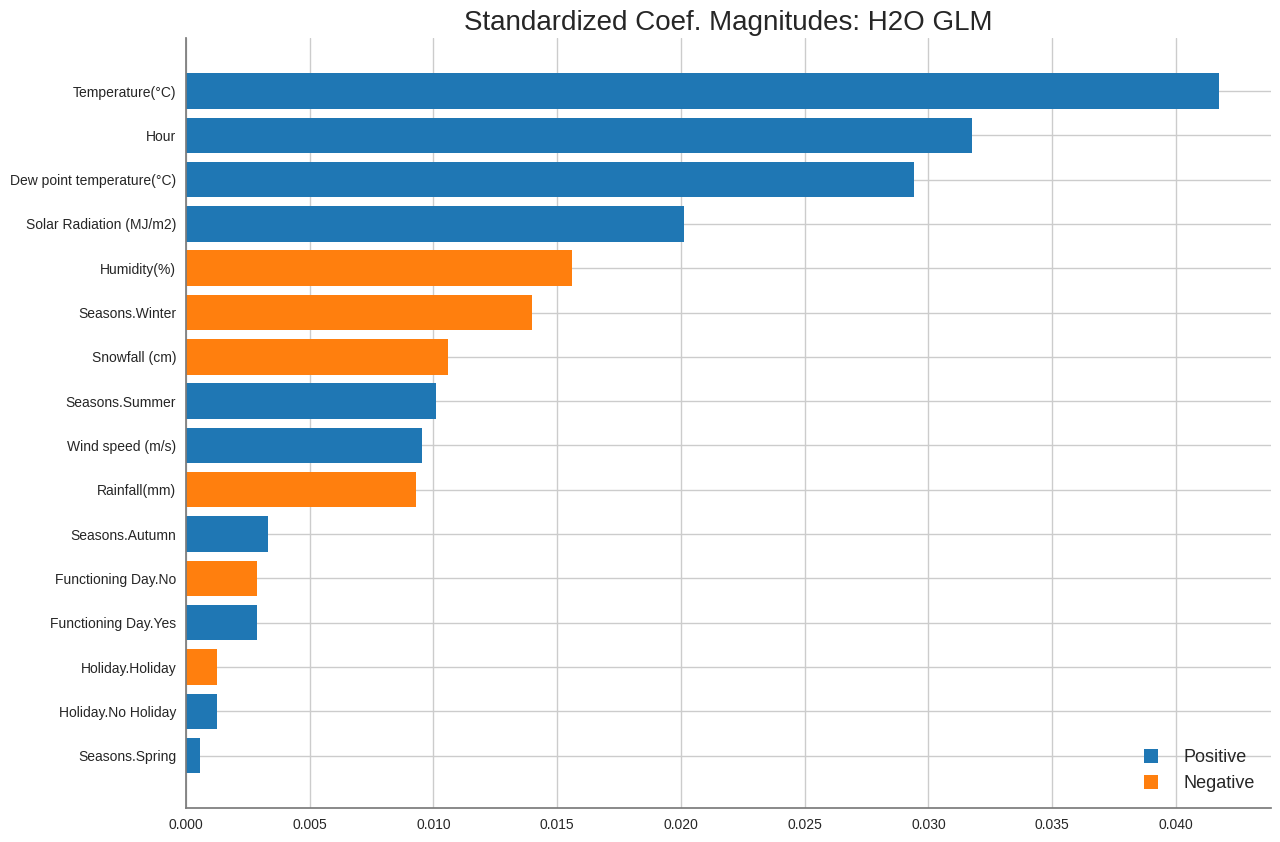

In [34]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

As per above plot Functioning Day, Temperature, Humidity, Hour, Seasons, Dew point temperature are important features.

The assumptions of linear regression are as follows:

Linearity: The relationship between the independent and dependent variables is linear.

Homoscedasticity: The variance of the residuals is constant across all levels of the independent variable.

Independence: The observations are independent of each other.

Normality: The residuals are normally distributed.

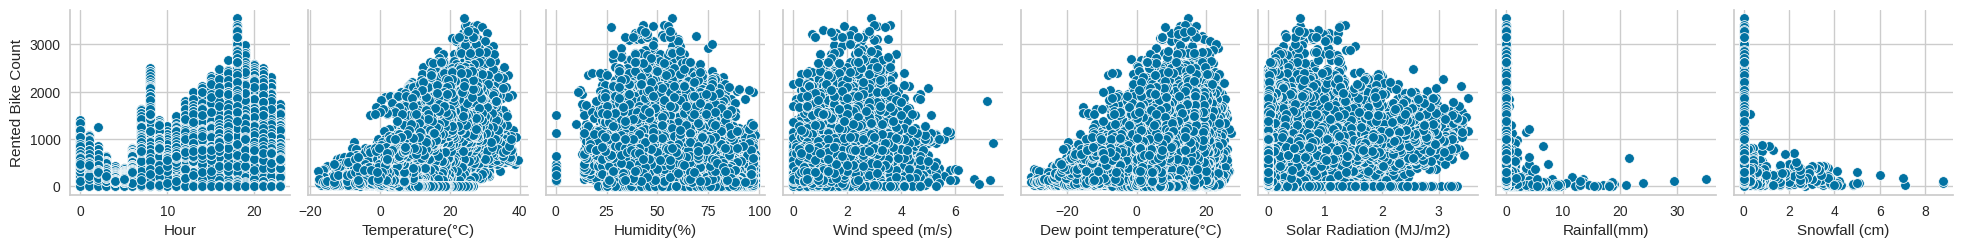

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Rented Bike Count' is the dependent variable and the rest are independent variables
sns.pairplot(data1, y_vars=['Rented Bike Count'], x_vars=['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'])
plt.show()

As per above plot we can conclude that relationship between dependent and independent variables are linear

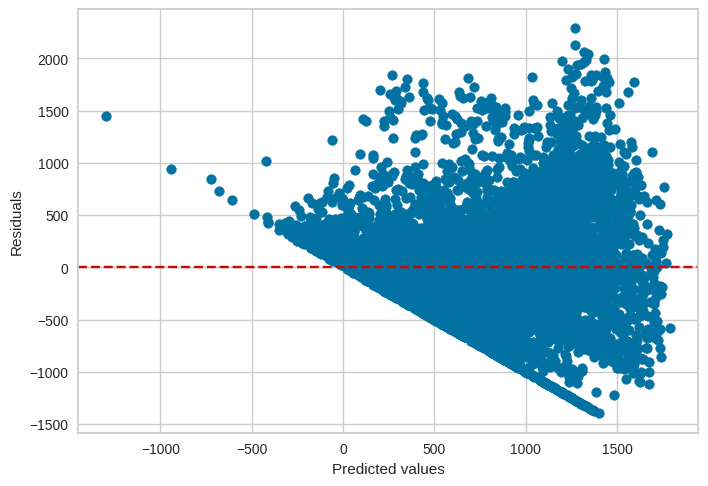

In [36]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'Rented Bike Count' is the dependent variable and the rest are independent variables
X = data1[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
y = data1['Rented Bike Count']

# Fit the linear regression model
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()

# Predictions
predictions = model.predict(X)

# Residuals
residuals = model.resid

# Homoscedasticity
plt.scatter(predictions, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

The pairplot suggests that the model fit is reasonable and that there are no major issues with linearity

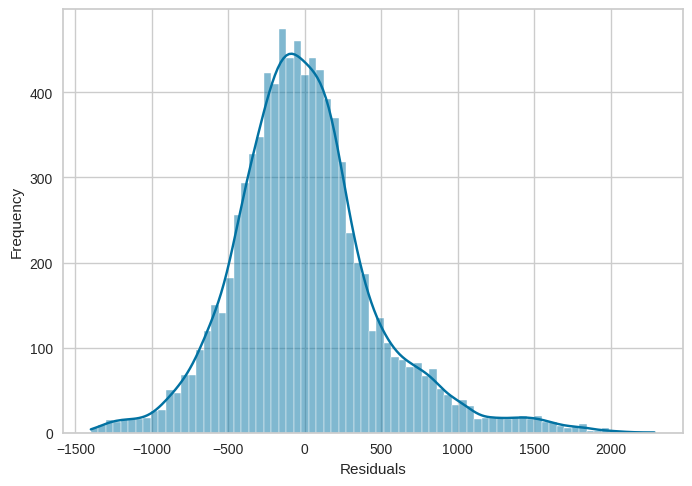

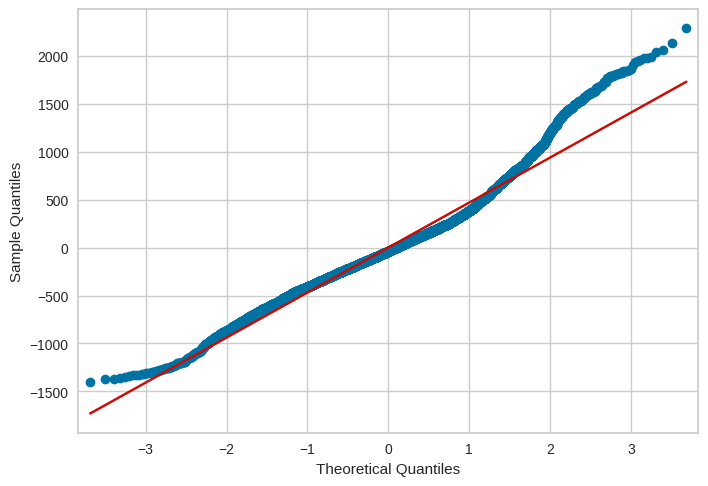

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Normality of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.show()

Both the plots give expected results hence all the assumptions are checked.

#Durbin-Watson test

In [57]:
# Perform the Durbin-Watson test
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals, axis=0)

# Print the test statistic
print("Durbin-Watson statistic:", durbin_watson_stat)

Durbin-Watson statistic: 0.4362053576237945


#Ridge Regression

In [39]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
bike_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
bike_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [40]:
bike_glm_regularization.train(x = X.columns.tolist()[1:], y = 'Rented Bike Count', training_frame = h2o.H2OFrame(df_train))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708394952576_44


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.001 )  8                             8                              1                       Key_Frame__upload_b84fe4250cc68ff44665d1aa31e2405b.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 222577.23199955255
RMSE: 471.78091525574933
MAE: 349.3921170833114
RMSLE: NaN
Mean Residual Deviance: 222577.23199955255
R^2: 0.47306597848580056
Null degrees of freedom: 7007
Residual degrees of freedom: 6999
Null deviance: 2960183207.3217826
Residual deviance: 1559821241.8528643
AIC: 106197.55273013048

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -----------------  -------------------
    2024-02-20 02:22:38  0.000 sec   0             2960183207.321771          422400.57182102895
    2024-02-20 02:22:38  0.034 sec   1                                                            471.78091525574933  222577.23199955255   349.3921170833114  0.47306597848580056

Variable Importances: 
variable                   relative_importance    scaled_importance    percentage
-------------------------  ---------------------  -------------------  ------------
Temperature(°C)            336.115                1                    0.359357
Hour                       189.596                0.564081             0.202706
Humidity(%)                186.877                0.555991             0.199799
Solar Radiation (MJ/m2)    77.6456                0.231009             0.0830148
Rainfall(mm)               67.0671                0.199536             0.0717048
Dew point temperature(°C)  57.2322                0.170276             0.0611898
Wind speed (m/s)           11.0226                0.0327942            0.0117848
Snowfall (cm)              9.76804                0.0290616            0.0104435

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [41]:
#Model details without regularization
bike_glm.train(x = X.columns.tolist()[1:], y = 'Rented Bike Count', training_frame = h2o.H2OFrame(df_train))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708394952576_45


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------------
    gaussian  identity  None              8                             8                              1                       Key_Frame__upload_abad0418928c0a67ad4b20560c5c4ef7.hex

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 222574.00230582687
RMSE: 471.77749236883574
MAE: 349.4932433638675
RMSLE: NaN
Mean Residual Deviance: 222574.00230582687
R^2: 0.4730736245306716
Null degrees of freedom: 7007
Residual degrees of freedom: 6999
Null deviance: 2960183207.3217826
Residual deviance: 1559798608.1592348
AIC: 106197.45104022429

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae       training_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -----------------  ------------------
    2024-02-20 02:22:43  0.000 sec   0             2960183207.321771          422400.57182102895
    2024-02-20 02:22:43  0.039 sec   1                                                            471.77749236883574  222574.00230582687   349.4932433638675  0.4730736245306716

Variable Importances: 
variable                   relative_importance    scaled_importance    percentage
-------------------------  ---------------------  -------------------  ------------
Temperature(°C)            351.833                1                    0.378803
Hour                       189.55                 0.538752             0.204081
Humidity(%)                180.711                0.513627             0.194563
Solar Radiation (MJ/m2)    78.8084                0.223994             0.0848495
Rainfall(mm)               67.2703                0.1912               0.072427
Dew point temperature(°C)  39.8207                0.113181             0.0428732
Wind speed (m/s)           10.9897                0.0312355            0.0118321
Snowfall (cm)              9.81873                0.0279074            0.0105714

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

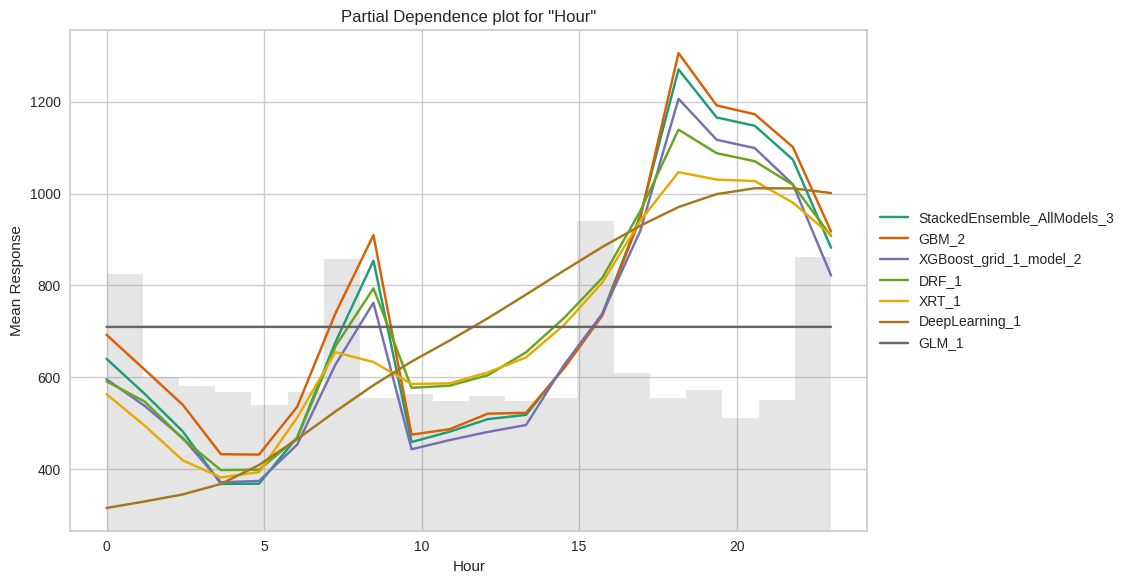

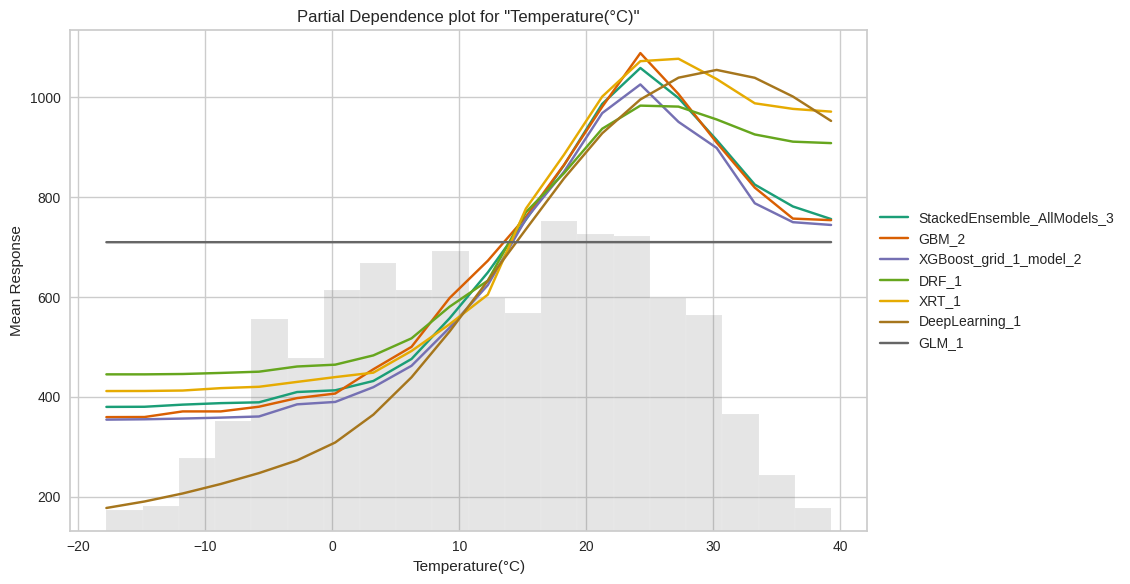

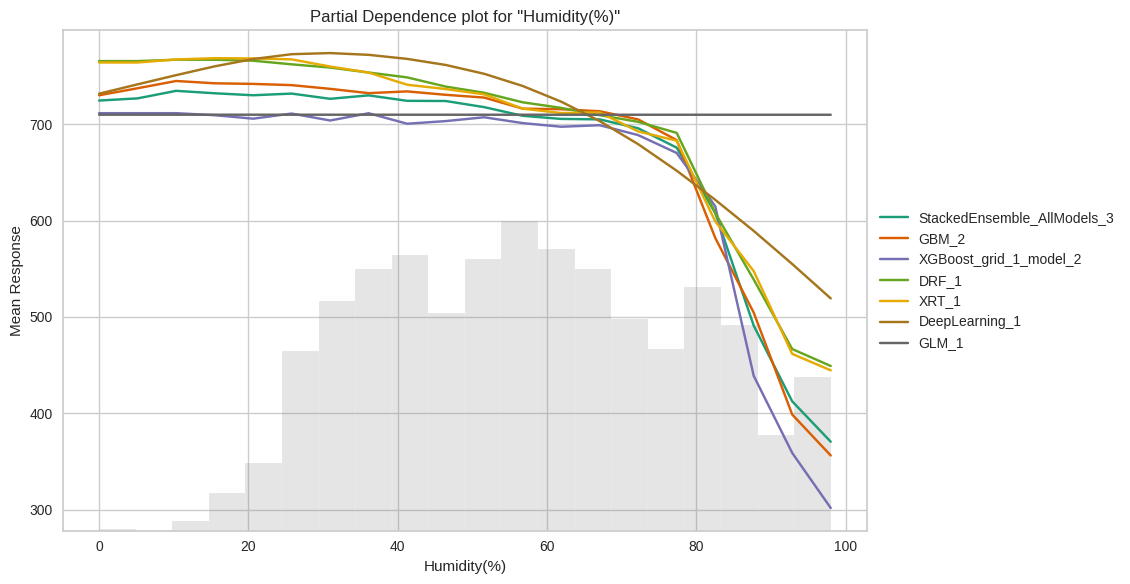

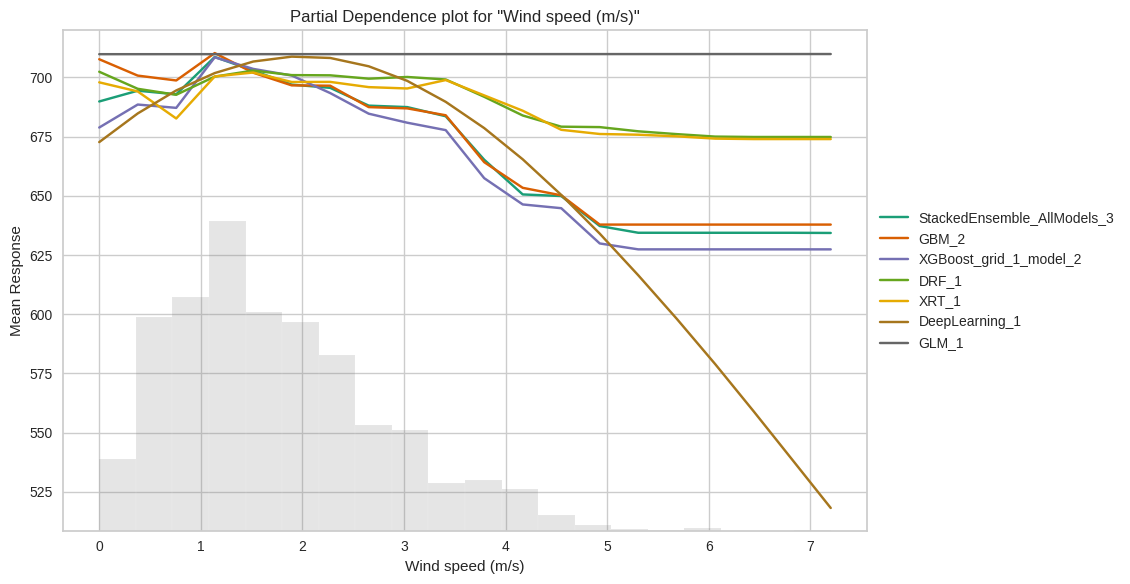

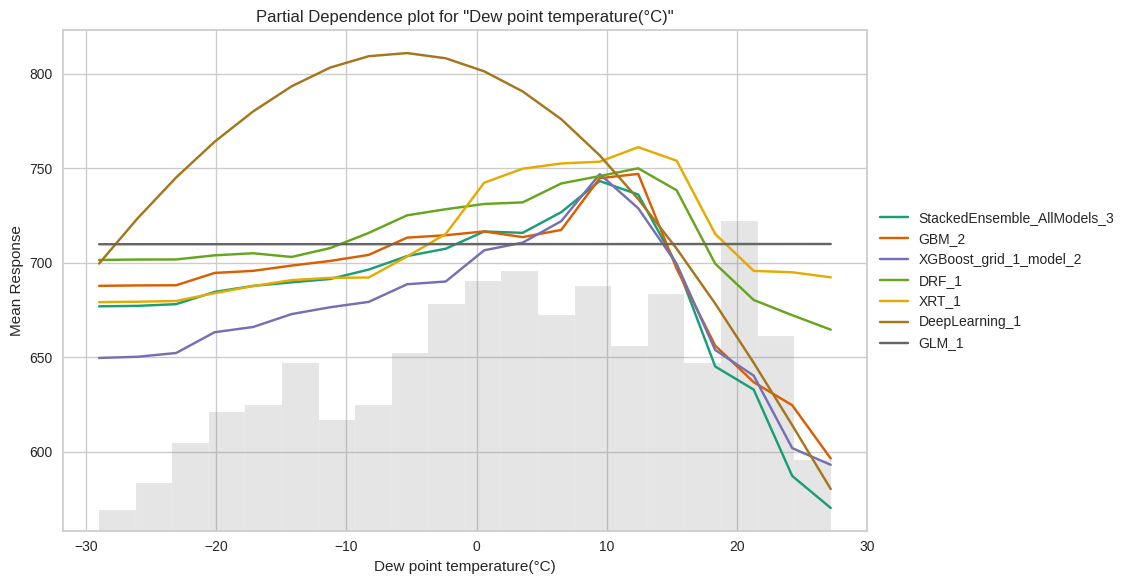

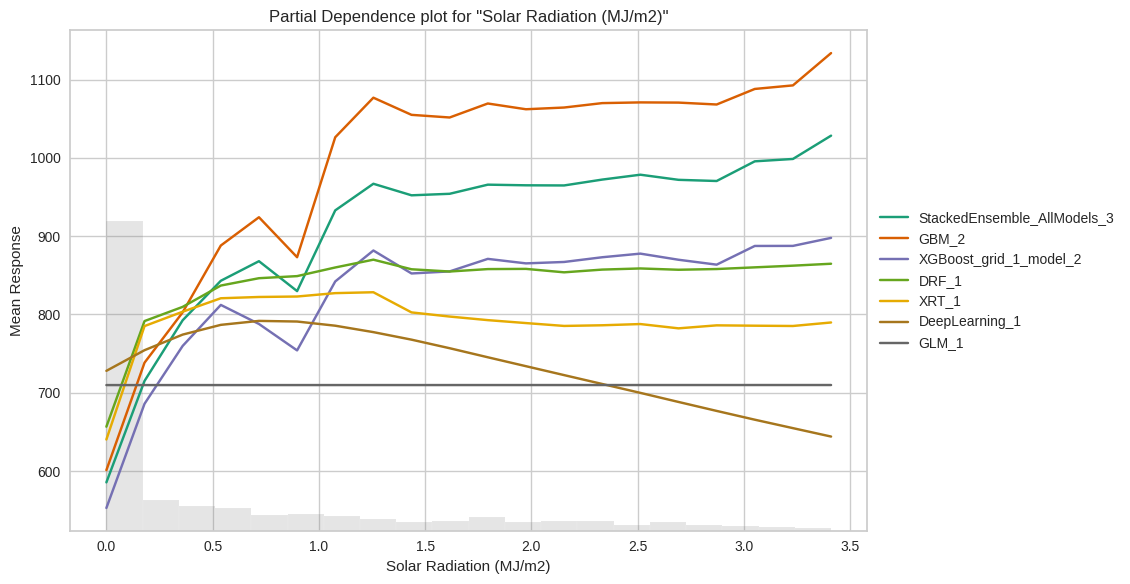

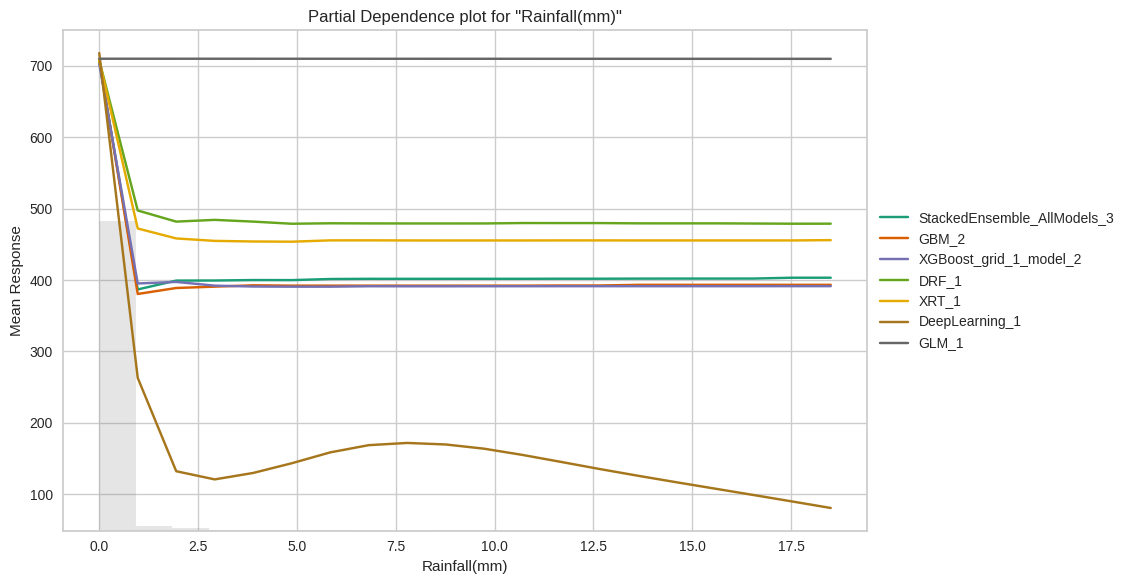

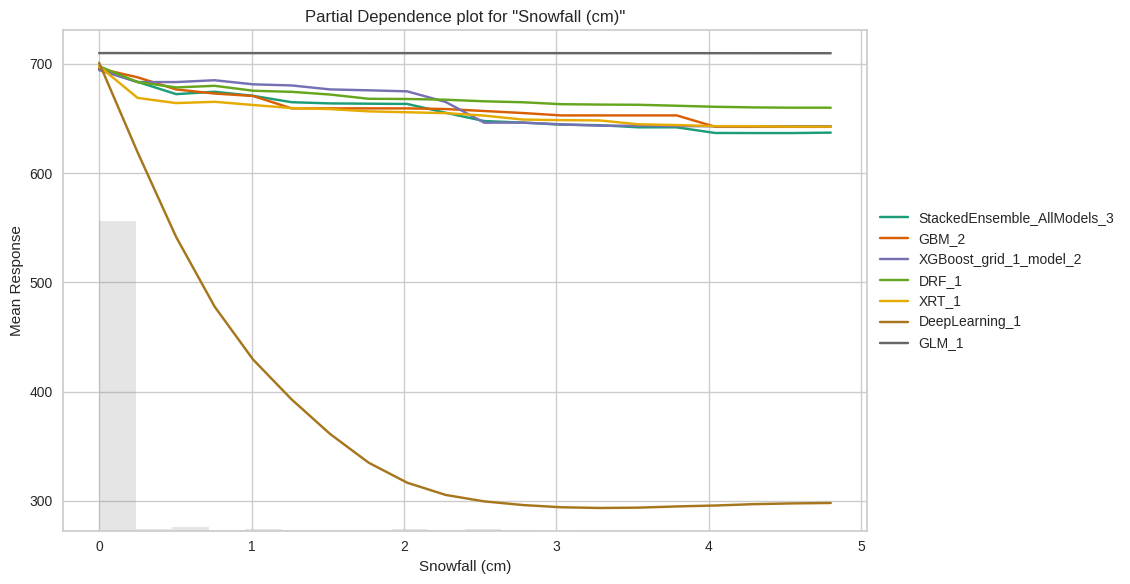

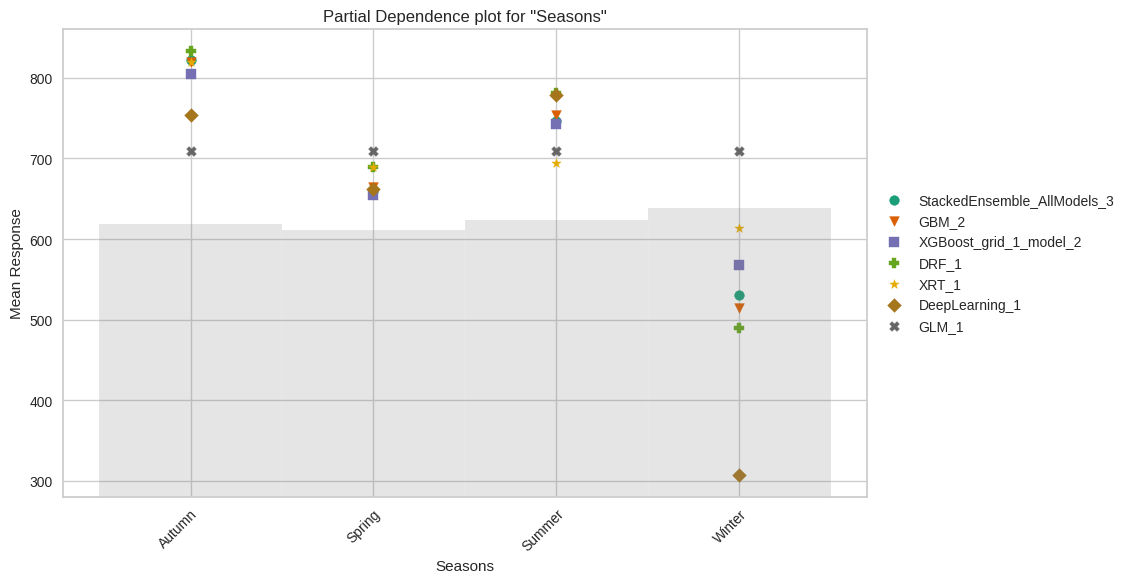

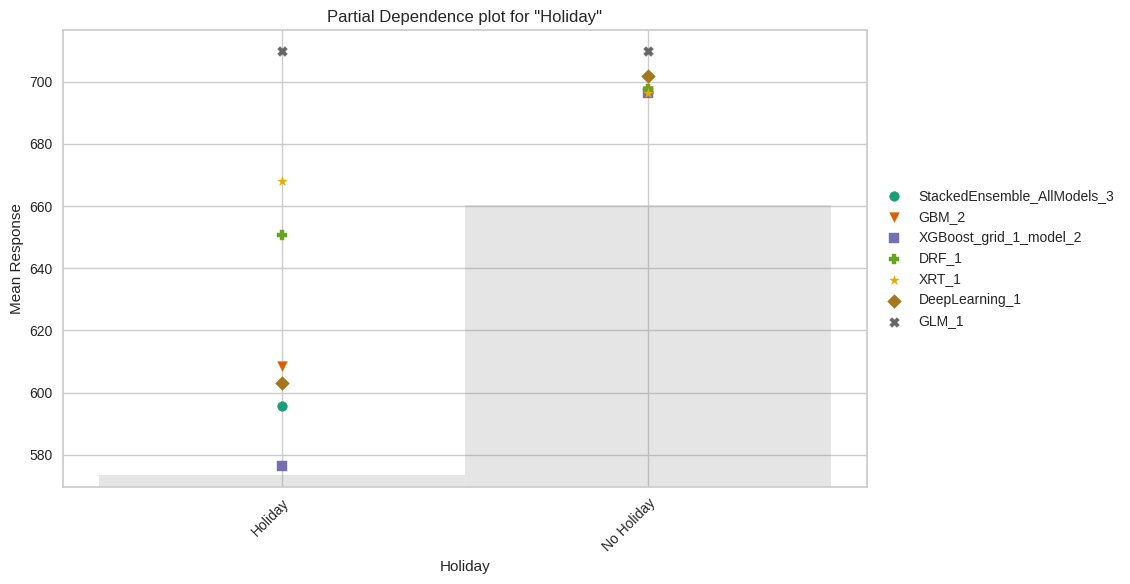

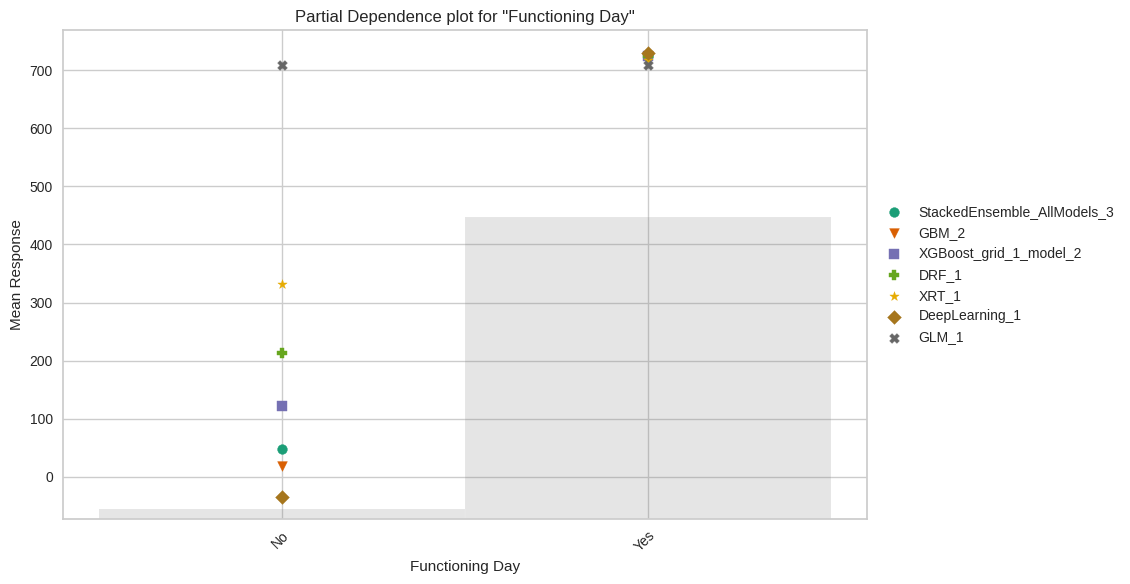

In [42]:
explain_model = aml1.explain(frame = h2o.H2OFrame(df_test), figsize = (12,6),include_explanations=['pdp'])

It can be concluded from the partial dependence ploat that the Stacked Ensemble Model has a consistent response to the Mean Response(Rented Bike Count)

##Local Explainability
In addition, it also provides local explainability for individual records. We can input a H2OFrame into the frame argument and indicate which row we would like explained using the row_index argument. In this case we are explaining the results for row 15 of the test frame.

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

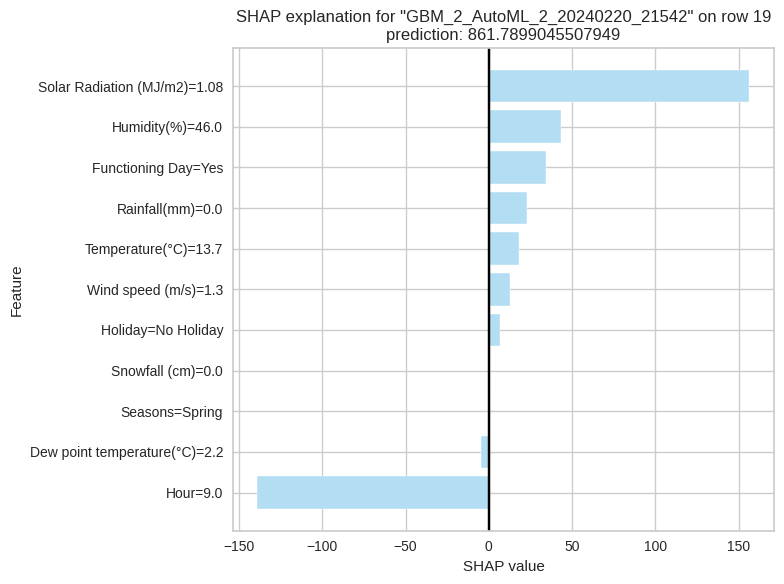

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

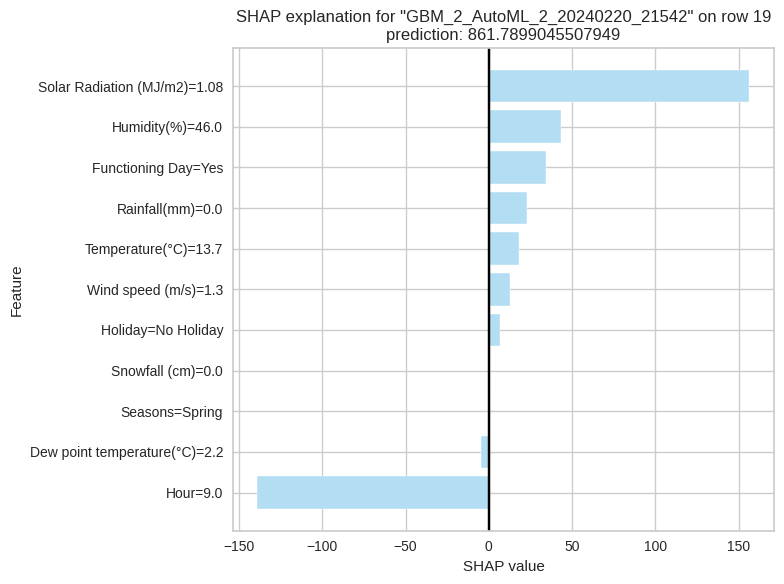

In [43]:
aml1.explain_row(frame = h2o.H2OFrame(df_test), row_index = 19, figsize = (8,6), exclude_explanations = "leaderboard")

In [44]:
print(df_test.iloc[19])

Date                         30/03/2018
Rented Bike Count                   772
Hour                                  9
Temperature(°C)                    13.7
Humidity(%)                          46
Wind speed (m/s)                    1.3
Visibility (10m)                    972
Dew point temperature(°C)           2.2
Solar Radiation (MJ/m2)            1.08
Rainfall(mm)                        0.0
Snowfall (cm)                       0.0
Seasons                          Spring
Holiday                      No Holiday
Functioning Day                     Yes
Name: 2865, dtype: object


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

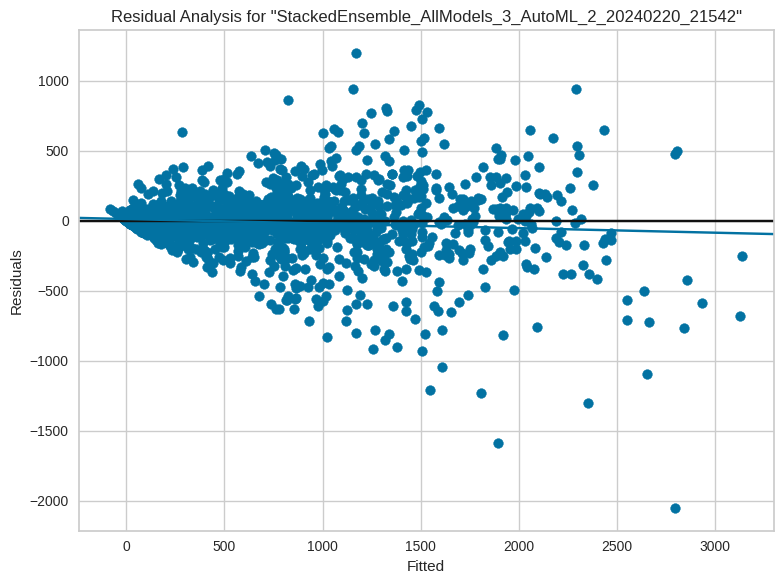

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

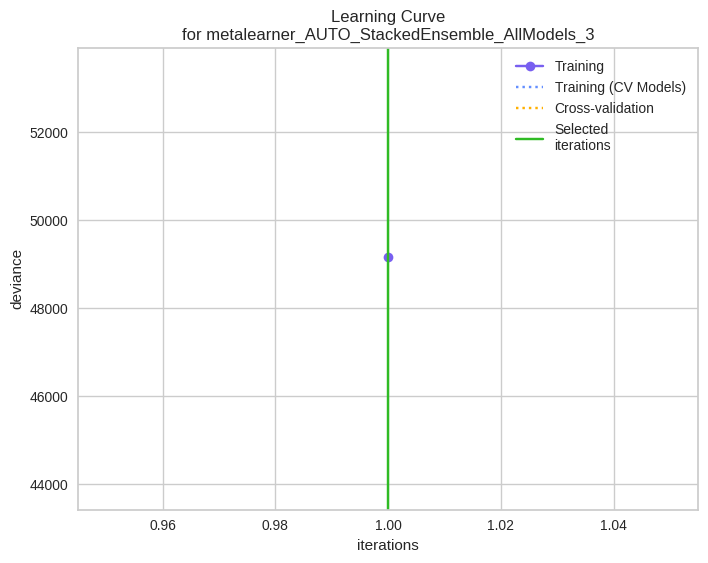

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

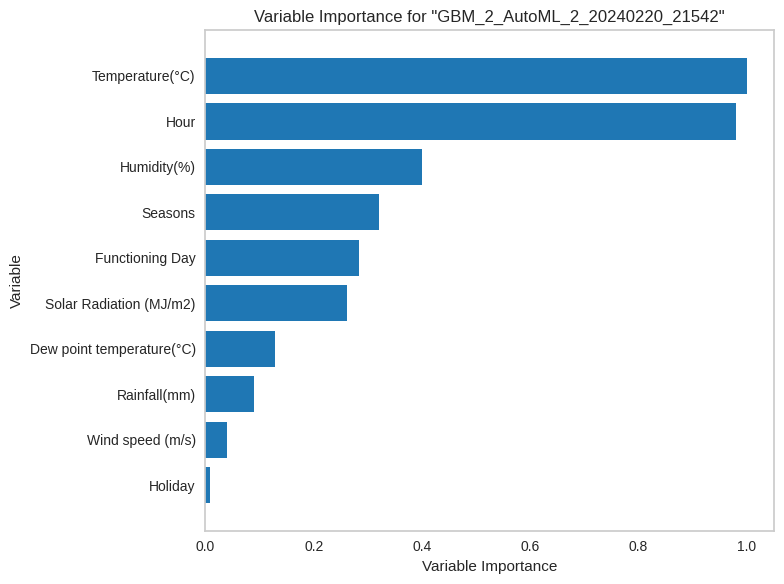

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

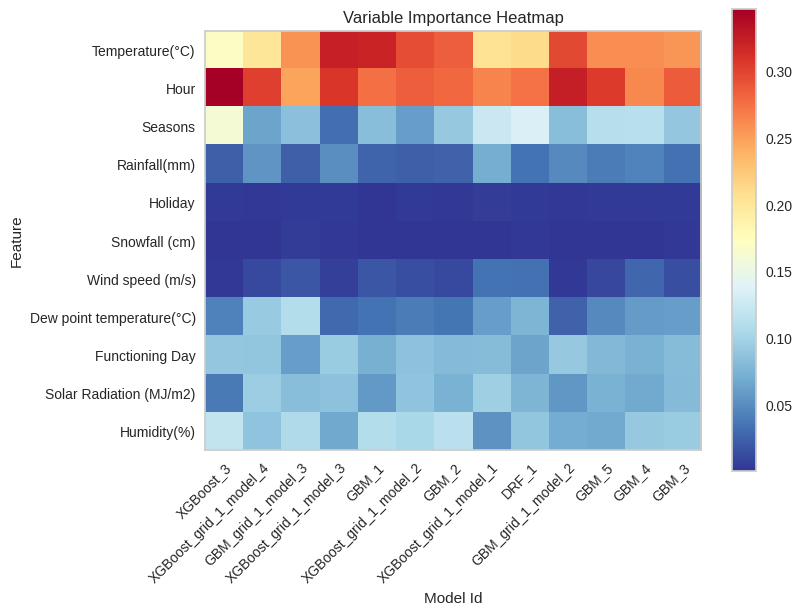

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

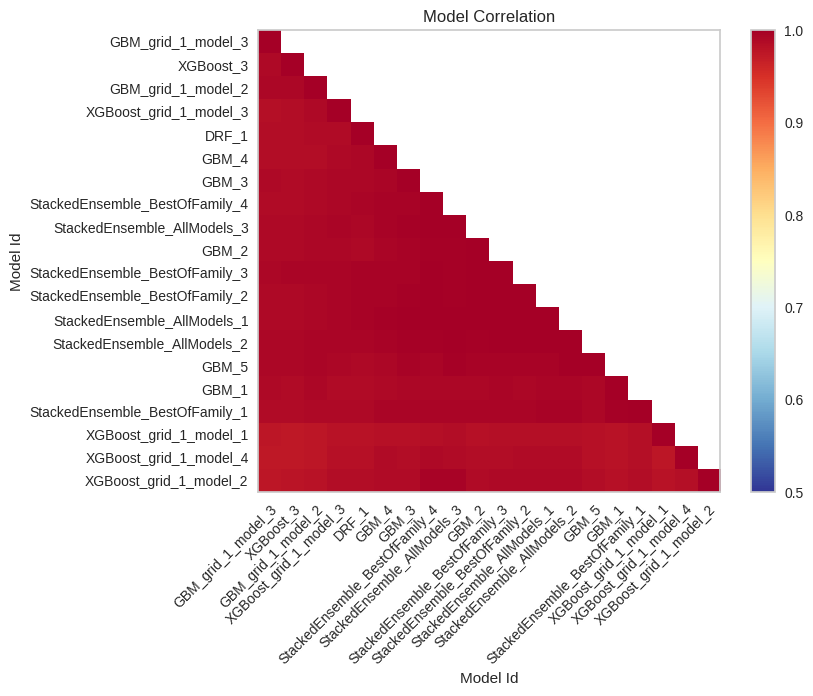

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

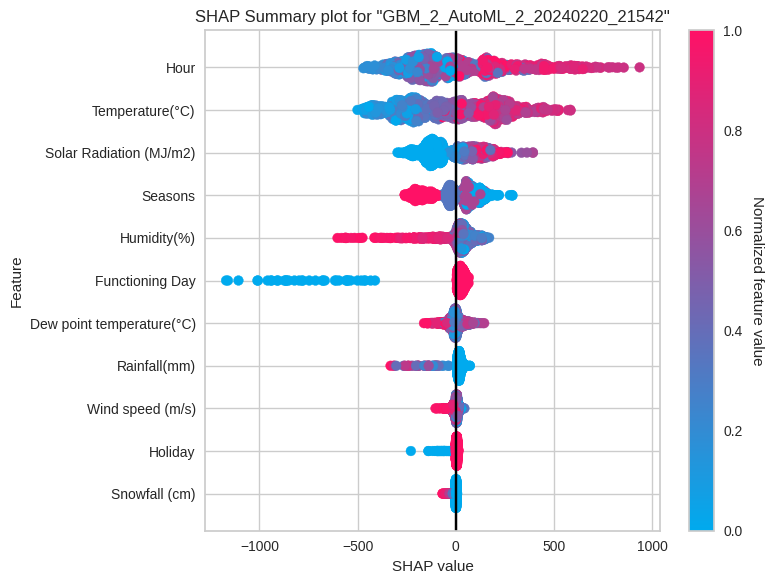

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

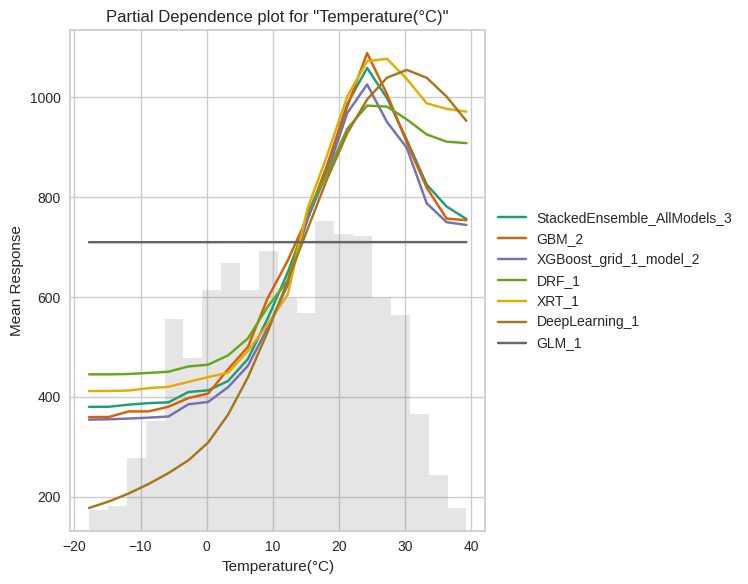

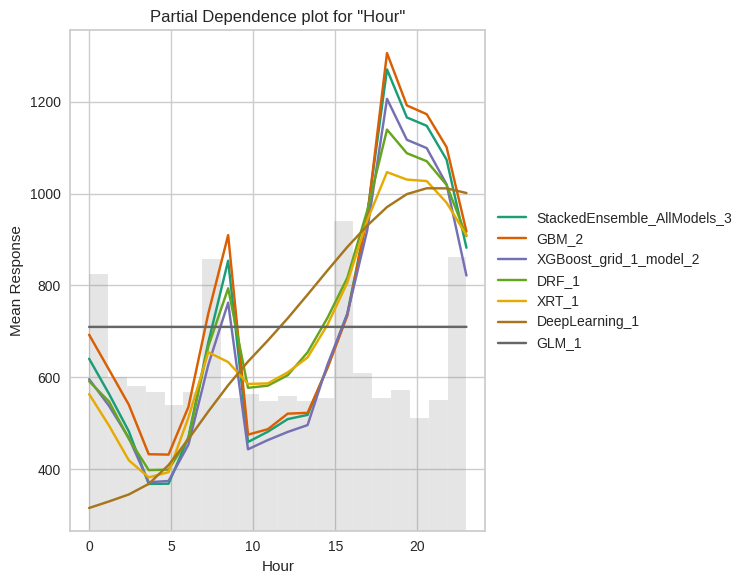

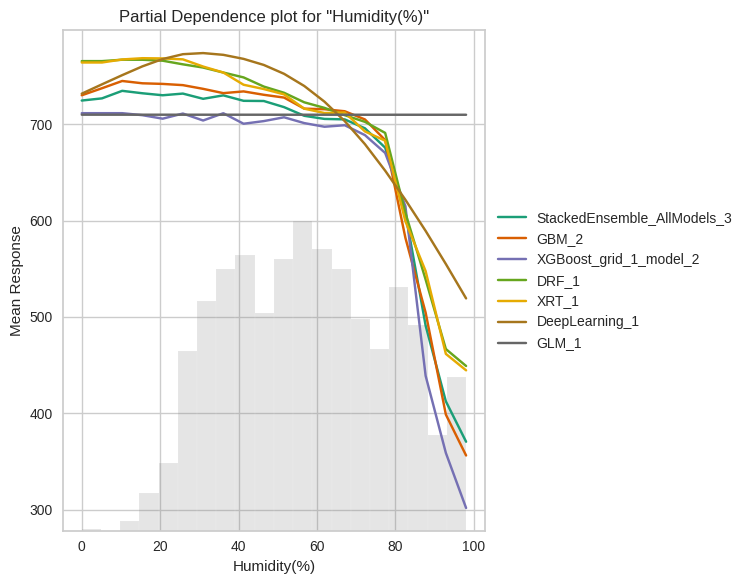

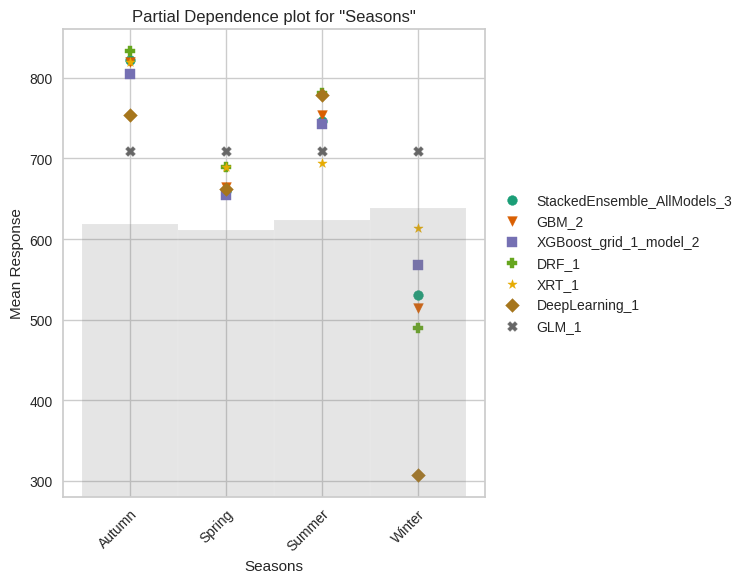

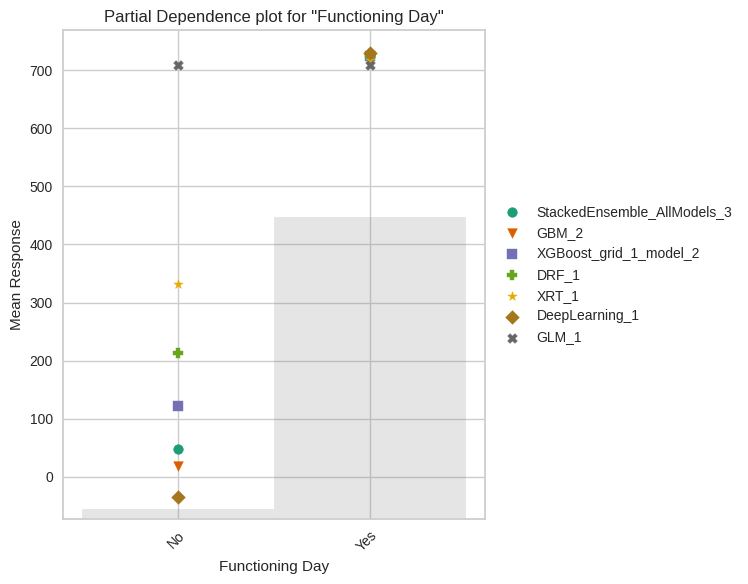

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

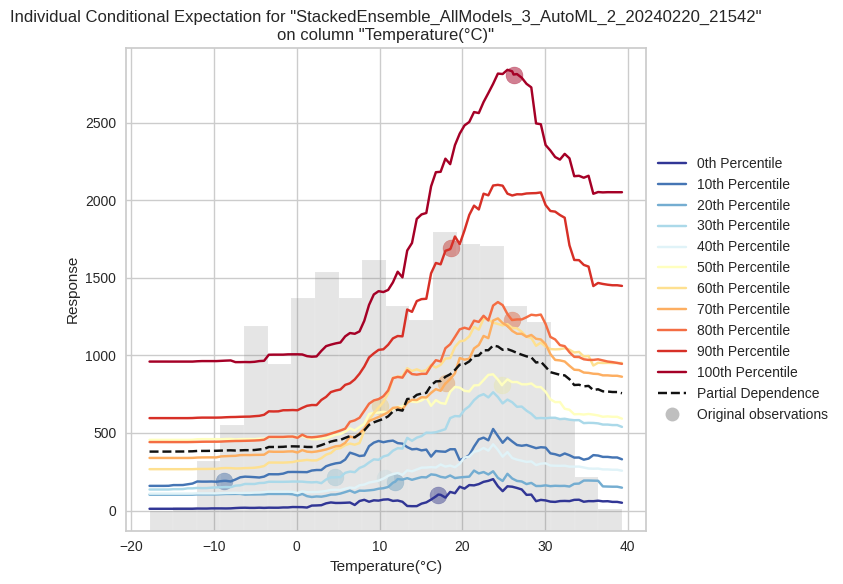

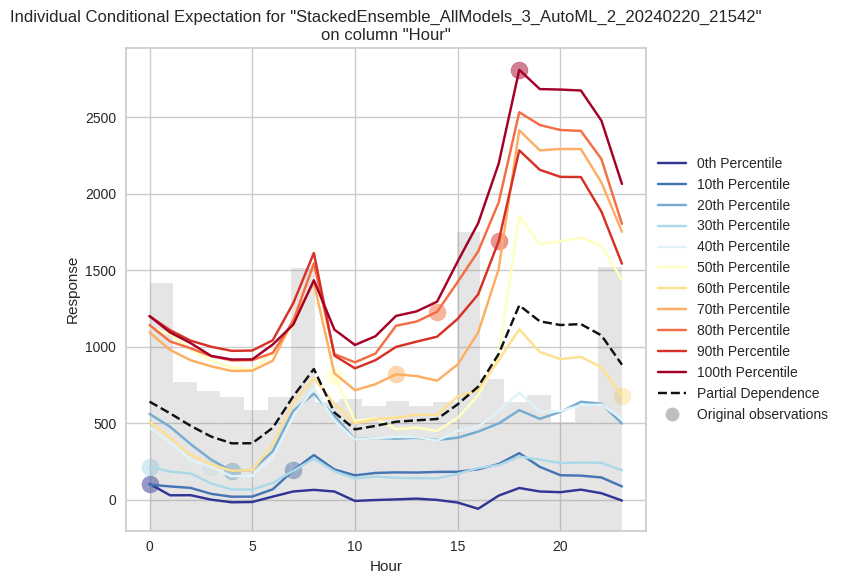

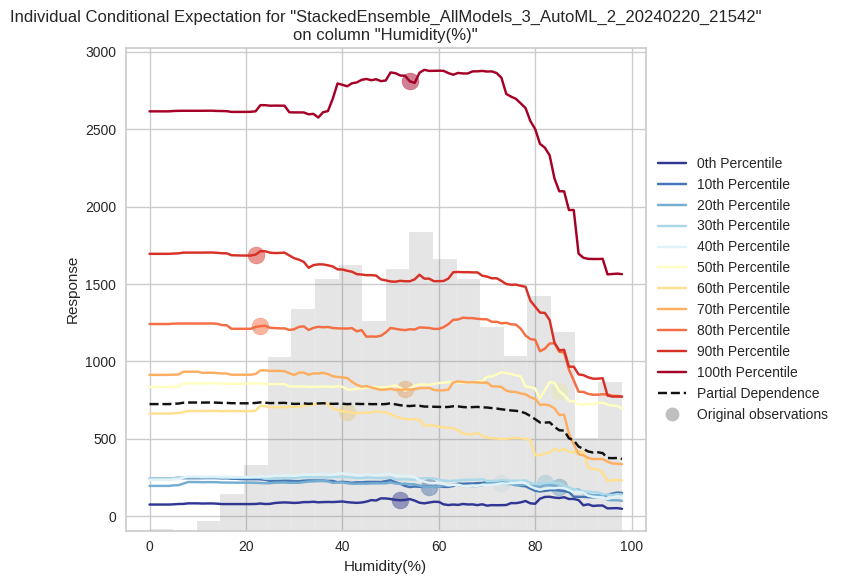

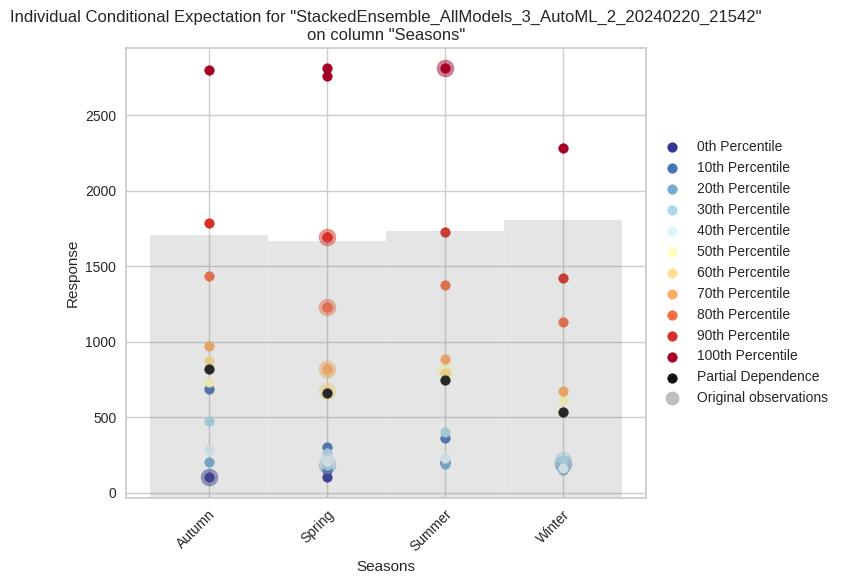

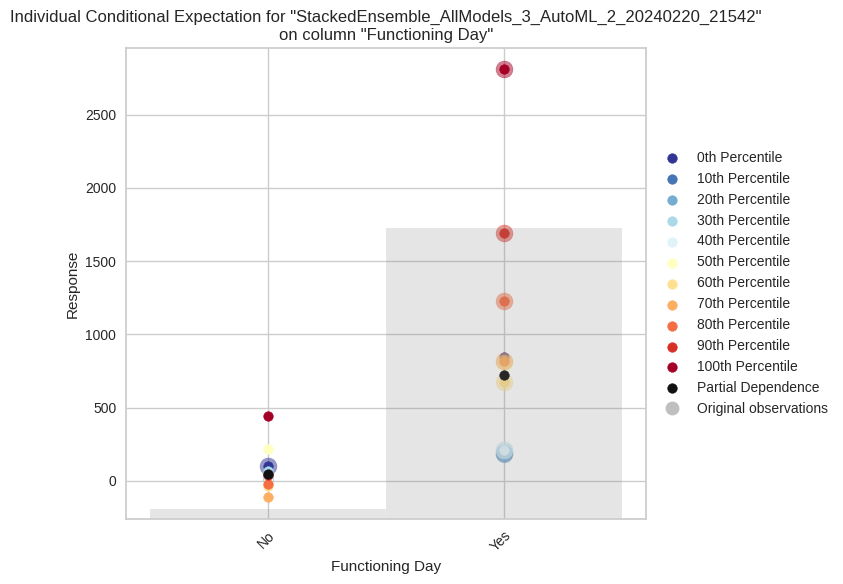

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

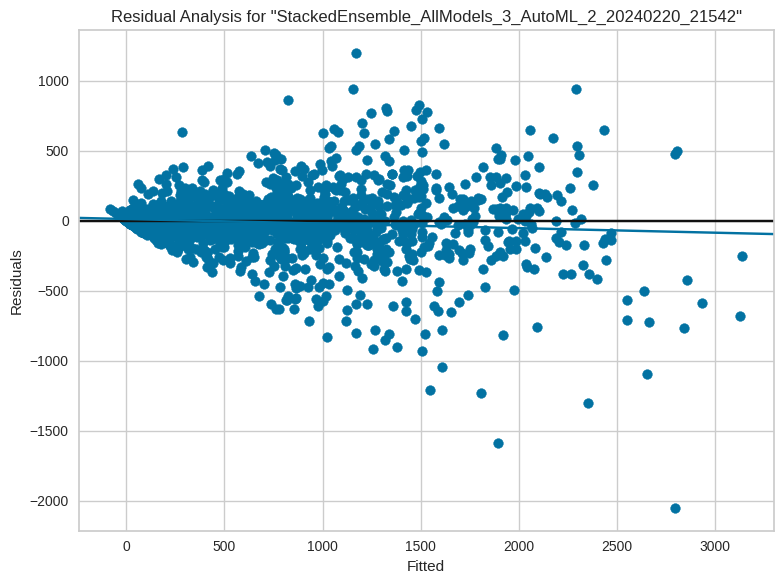

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

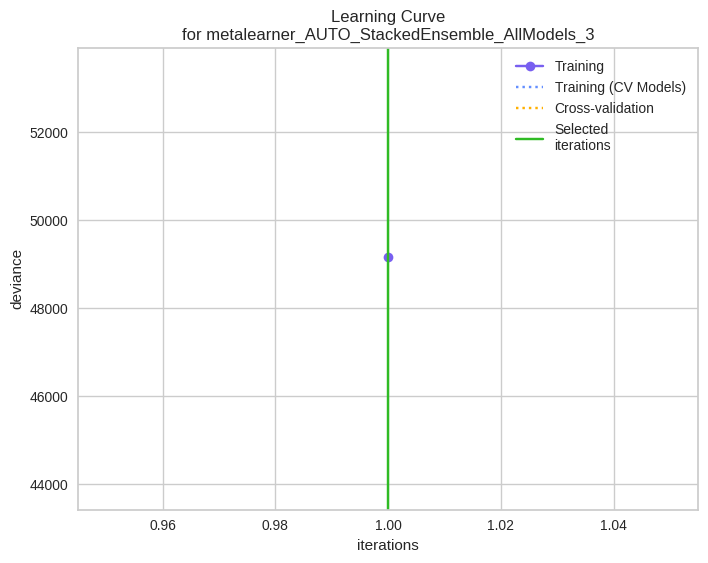

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

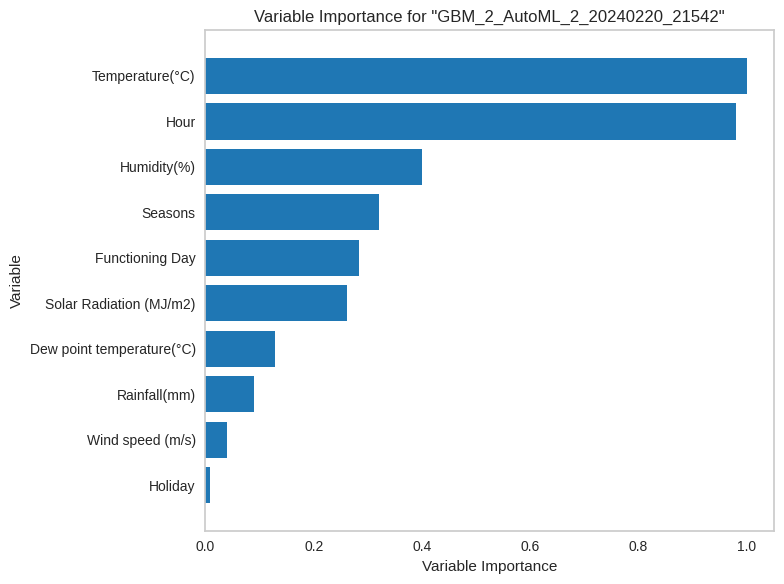

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

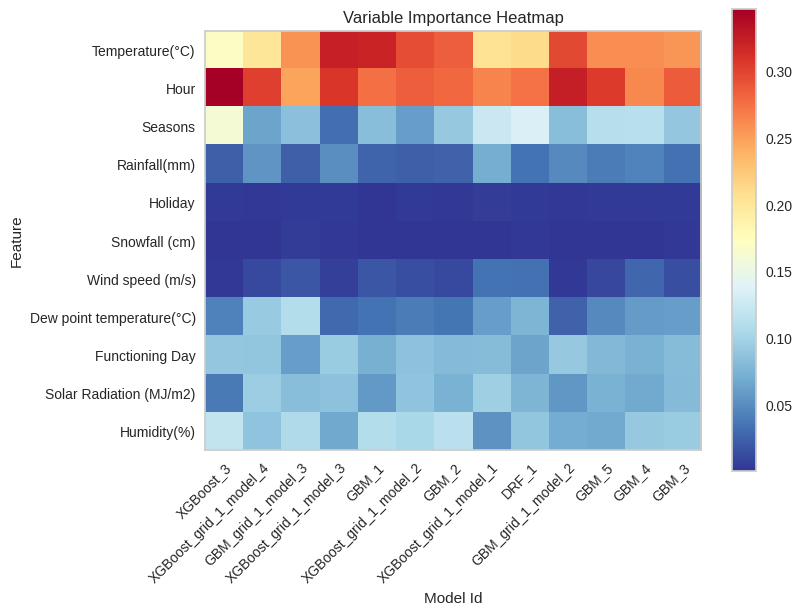

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

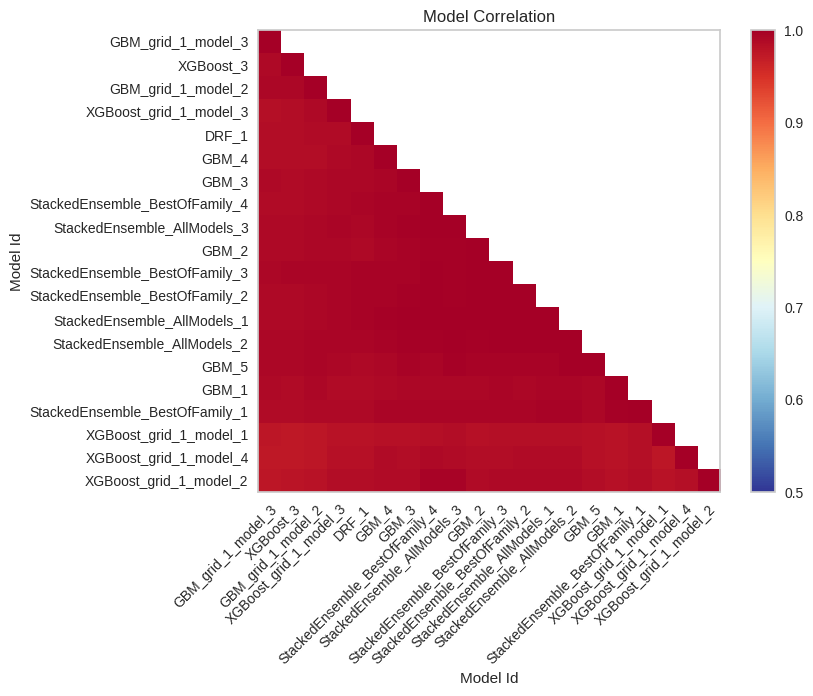

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

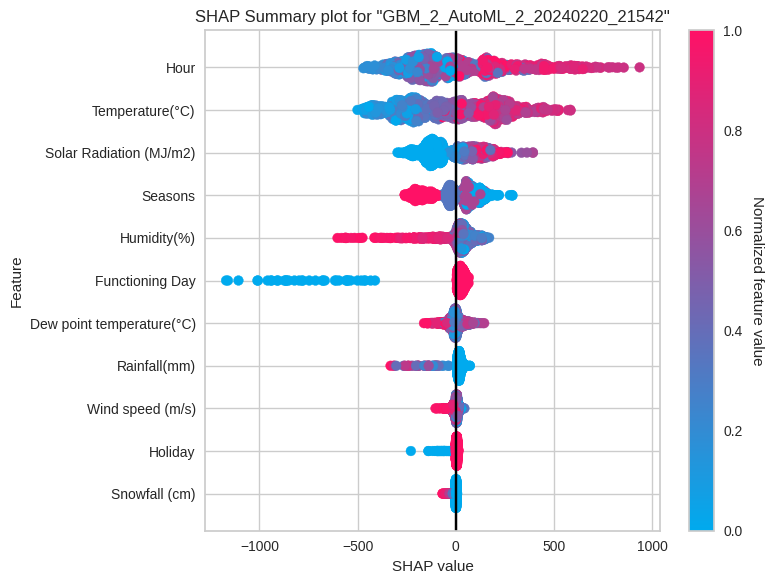

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

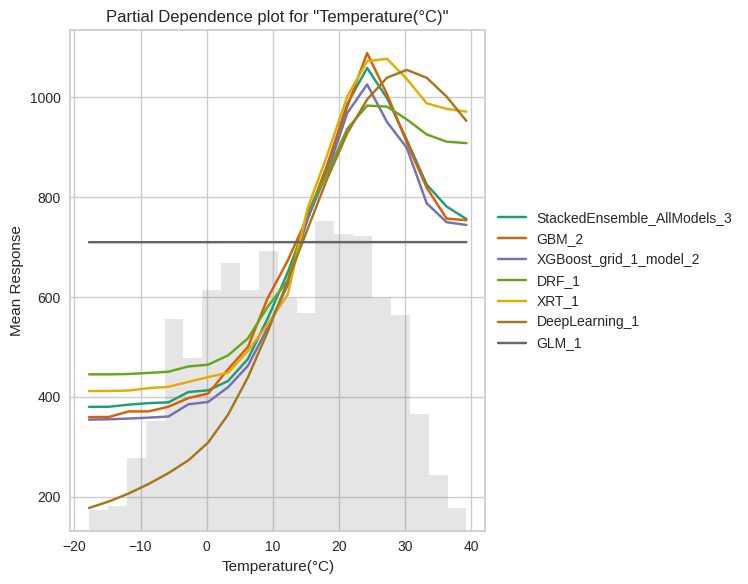

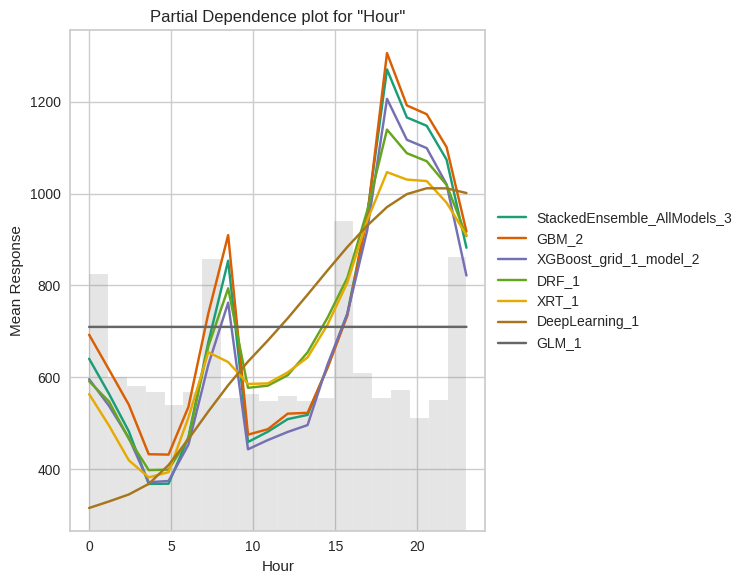

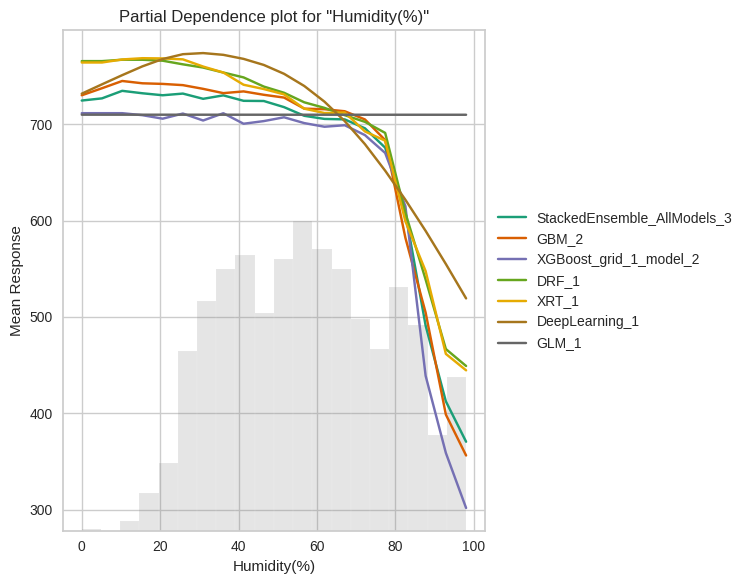

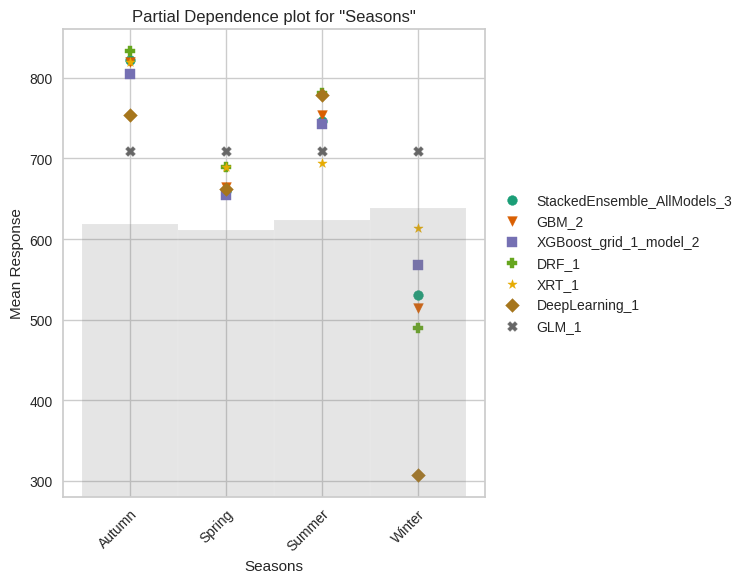

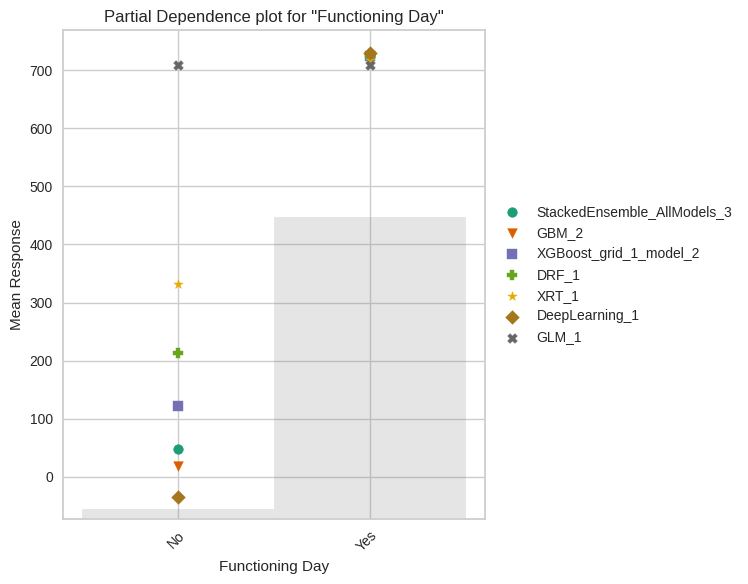

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

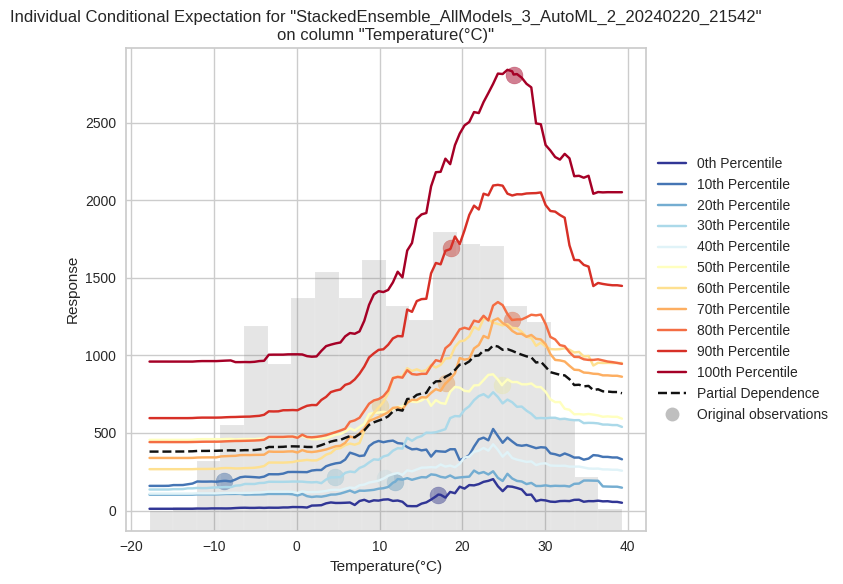

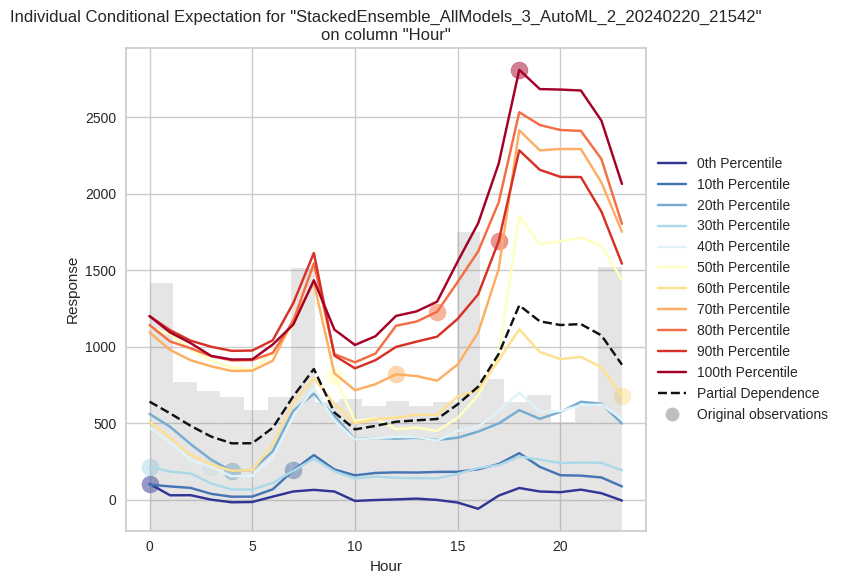

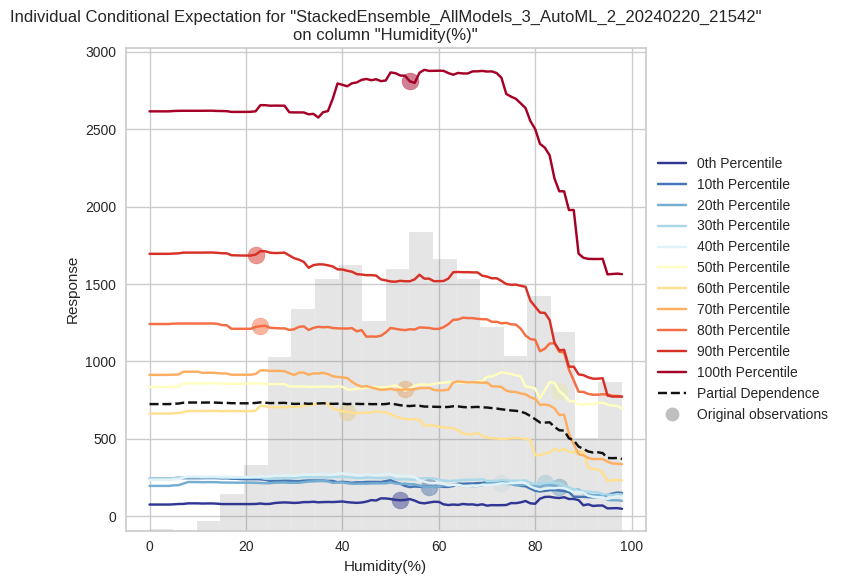

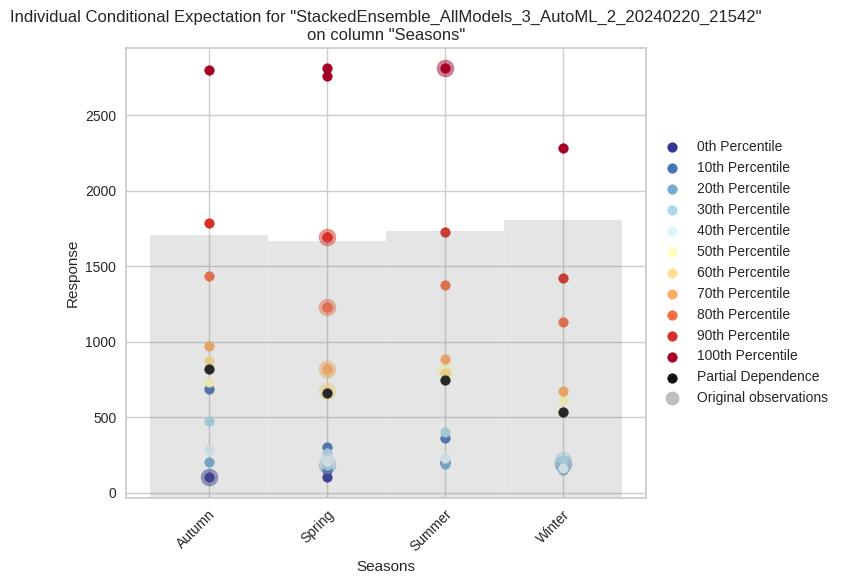

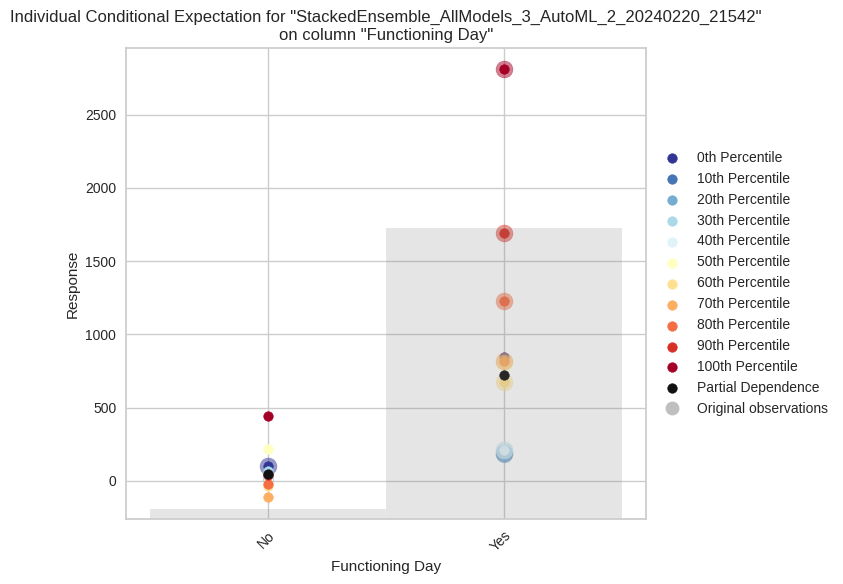

In [45]:
aml1.explain(frame = h2o.H2OFrame(df_test), figsize = (8,6), exclude_explanations = "leaderboard")

#Hyperparameter Tuning

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Load the dataset
# Assuming the dataset is stored in a DataFrame named 'df'
# Perform any necessary data preprocessing and feature engineering

# Split the data into features (X) and the target variable (y)
y = data1['Rented Bike Count']
X = data1[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model
model = Ridge()

# Define the grid of hyperparameters to search
param_grid = {
    'alpha': [0.1, 1, 10]  # Example values for the regularization strength
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test set R^2 score with best hyperparameters: ", test_score)

Best hyperparameters:  {'alpha': 10}
Test set R^2 score with best hyperparameters:  0.4650630303842125


 Hyperparameter tuning for a Ridge regression model, and the best hyperparameter value found is alpha = 10. Additionally, the model's performance on the test set, as measured by the R-squared (R^2) score, is approximately 0.465.

This R^2 score indicates that the model explains around 46.5% of the variance in the target variable, which in this case is the number of rented bike counts. While the R^2 score provides a measure of how well the model fits the observed data, it's important to interpret this score in the context of your specific application and domain.

#Conclusion
AutoML was executed initially with H2O.ai, and StackedEnsemble_AllModels_2_AutoML_1_20240220_21040 emerged as the best model. Initially, the OLS model exhibited 72.4% accuracy and a condition number of 3.74e+03, which is considered very high. It was then discovered that the 'Visibility' feature exhibited significant multicollinearity, as indicated by the Variance Inflation Factor. Consequently, after dropping the 'Visibility' feature due to its high multicollinearity, the OLS model's performance slightly adjusted to 72.3% accuracy with a substantially improved condition number of 150, which is very favorable.
Various diagnostic plots, including correlation matrices, heatmaps, and pair plots, were generated to explore the data further. Subsequently, AutoML was executed again, and this time, the StackedEnsemble_AllModels_3_AutoML_2_20240220_21542 model was identified as the best performer, with all parameters thoroughly evaluated.
A variable importance plot was created using the GBM algorithm model, which concluded that temperature and hour have a significant impact on the target variable. This finding was corroborated by a GLM model analysis for standard coefficients, which also highlighted temperature and hour as having a substantial influence on the target variable.
The assumptions of linear regression were meticulously checked. Additionally, PDP and SHAP plots were generated to provide deeper insights. AutoML's explain method was utilized to generate a comprehensive suite of plots, including PDP, SHAP, Individual Conditional Expectation, Model Correlation, Variable Importance, Variable Importance Heatmap, Learning Curve Plot, Residual Analysis, and more, offering a holistic understanding of the model's behavior and performance.
Lastly, hyperparameter tuning was conducted for the Ridge regression model, further refining the model's performance.

#Assignment Question/Answers
Q1) Is the relationship significant?

 A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for 'Visibility' was greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

Q2) Are any model assumptions violated? Assumptions for linear regression are:

Linear relationship- The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.
Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.
No or little multicollinearity-This can be determined by correlation matrix. For this model some of the assumptions are violated. Multicollinearity exists for variable Visibility.
No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 0.4, therefore this assumption is violated.

Q3) Is there any multicollinearity in the model? When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved. Currently high correlation exists in 'Visibility' feature

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

 Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used, or it can be observed from graphs too whether there is any pattern followed or not. When correlation matrix is computed for the model, it can be observed that Temperature and Dew Point Temperature are correlated to each other. Other than those other predictors are independent from each other.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model. From the variable importance plot, the most to least important variables are displayed. For my model Temperature, Hour,Dew point temperature and Solar radiations are top 4 most important variables to determine Rented Bike Count. VIF and p-values for visibility was high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense?

 For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.86 which is close to 1 considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help?

 Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

Q8) Which independent variables are significant? Variables are significant when p-value is less than 0.05. For this model except for 'Visiblity' all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important?

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using grid search with cross-validation. The best hyperparameters for this model are:- Best hyperparameters:  {'alpha': 10}
Test set R^2 score with best hyperparameters:  0.4650630303842125

Q10) Coding professionalism
Proper comments and code is written.

#LICENSE
MIT License

Copyright (c) 2024 HemantGaikwad7

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

#REFERENCES
H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression

Dataset- https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

Professor's AutoML Notebook- https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/AutoML_Basics_InnerWorkings_Interpretations.ipynb

ChatGPT- https://chat.openai.com/

Perplexity- https://www.perplexity.ai/